In [1]:
# pip install yahoo_fin

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns
from yahoo_fin.stock_info import get_data  

import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid", {"grid.linestyle": "-"})
#sns.set_context('paper')
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
import statsmodels.formula.api as smf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing
import  statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
#reliance= get_data("RELIANCE.NS", start_date="01/01/2000", end_date="05/01/2024", index_as_date = True, interval="1d")
#reliance.to_csv('reliance.csv')

In [2]:
df=pd.read_csv('reliance.csv',parse_dates=True,index_col='Unnamed: 0')

In [3]:
df

,open,high,low,close,adjclose,volume,ticker
2000-01-03,33.917892,35.945827,33.917892,35.945827,26.684870,31204789.0,RELIANCE.NS
2000-01-04,36.902668,38.823490,35.888702,38.823490,28.821135,66436055.0,RELIANCE.NS
2000-01-05,36.652744,41.115627,36.652744,40.344440,29.950233,187894923.0,RELIANCE.NS
2000-01-06,41.272720,42.943623,41.272720,42.036766,31.206556,109810562.0,RELIANCE.NS
2000-01-07,42.129593,45.399994,41.843967,44.921570,33.348125,139140630.0,RELIANCE.NS
...,...,...,...,...,...,...,...
2024-04-24,2927.000000,2937.100098,2899.000000,2900.350098,2900.350098,5231388.0,RELIANCE.NS
2024-04-25,2885.000000,2935.949951,2883.000000,2919.949951,2919.949951,7971963.0,RELIANCE.NS
2024-04-26,2927.899902,2930.000000,2900.000000,2905.100098,2905.100098,4706924.0,RELIANCE.NS
2024-04-29,2900.000000,2935.800049,2900.000000,2930.050049,2930.050049,3623987.0,RELIANCE.NS


In [4]:
df.head(10)

,open,high,low,close,adjclose,volume,ticker
2000-01-03,33.917892,35.945827,33.917892,35.945827,26.684870,31204789.0,RELIANCE.NS
2000-01-04,36.902668,38.823490,35.888702,38.823490,28.821135,66436055.0,RELIANCE.NS
2000-01-05,36.652744,41.115627,36.652744,40.344440,29.950233,187894923.0,RELIANCE.NS
2000-01-06,41.272720,42.943623,41.272720,42.036766,31.206556,109810562.0,RELIANCE.NS
2000-01-07,42.129593,45.399994,41.843967,44.921570,33.348125,139140630.0,RELIANCE.NS
2000-01-10,45.328587,45.514240,43.600559,44.057556,32.706718,93948967.0,RELIANCE.NS
2000-01-11,43.979012,44.407448,40.537235,41.201313,30.586351,87837898.0,RELIANCE.NS
2000-01-12,41.272720,43.557716,40.294456,43.086433,31.985786,84793235.0,RELIANCE.NS
2000-01-13,43.700527,45.185776,43.429184,44.535976,33.061878,119569925.0,RELIANCE.NS
2000-01-14,44.200371,45.935539,44.200371,45.171494,33.533665,94253808.0,RELIANCE.NS


In [5]:
df.tail()

,open,high,low,close,adjclose,volume,ticker
2024-04-24,2927.000000,2937.100098,2899.00,2900.350098,2900.350098,5231388.0,RELIANCE.NS
2024-04-25,2885.000000,2935.949951,2883.00,2919.949951,2919.949951,7971963.0,RELIANCE.NS
2024-04-26,2927.899902,2930.000000,2900.00,2905.100098,2905.100098,4706924.0,RELIANCE.NS
2024-04-29,2900.000000,2935.800049,2900.00,2930.050049,2930.050049,3623987.0,RELIANCE.NS
2024-04-30,2936.000000,2966.149902,2925.75,2934.000000,2934.000000,5737131.0,RELIANCE.NS


In [6]:
df=df.asfreq('b')

# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6347 entries, 2000-01-03 to 2024-04-30
Freq: B
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      6068 non-null   float64
 1   high      6068 non-null   float64
 2   low       6068 non-null   float64
 3   close     6068 non-null   float64
 4   adjclose  6068 non-null   float64
 5   volume    6068 non-null   float64
 6   ticker    6071 non-null   object 
dtypes: float64(6), object(1)
memory usage: 396.7+ KB


In [8]:
df.describe()

,open,high,low,close,adjclose,volume
count,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6.068000e+03
mean,689.356051,697.211951,680.962853,688.793408,665.674967,1.759809e+07
std,744.467175,751.576144,737.061533,744.080412,747.265479,1.927259e+07
min,29.347902,31.347273,28.155420,29.019436,21.542973,0.000000e+00
25%,114.356853,116.763237,113.837374,115.376179,100.070017,6.593969e+06
50%,431.702179,437.051025,425.513306,431.610748,396.298050,1.052557e+07
75%,852.249512,861.061386,843.117630,851.209488,828.557556,2.120244e+07
max,3011.550049,3024.899902,2974.449951,3014.800049,3014.800049,3.161448e+08


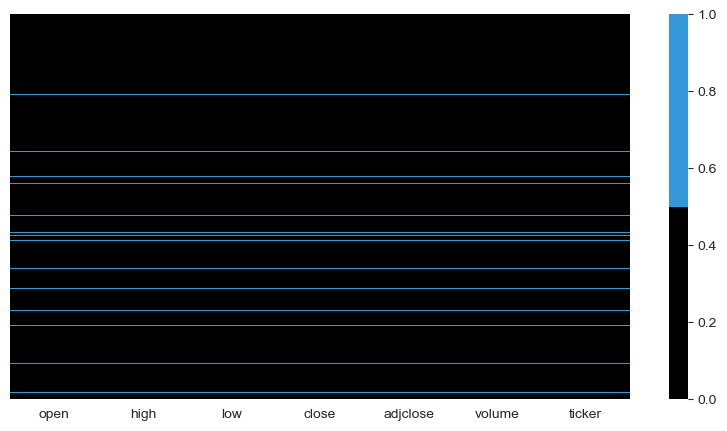

In [9]:
custom_palette = sns.color_palette([ "black","#3498db"])
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cmap=custom_palette)
plt.show()

In [10]:
df.isnull().sum()

open        279
high        279
low         279
close       279
adjclose    279
volume      279
ticker      276
dtype: int64

In [11]:
df=df.interpolate(method='linear')

In [12]:
df.isnull().sum()

open          0
high          0
low           0
close         0
adjclose      0
volume        0
ticker      276
dtype: int64

In [15]:
df

,open,high,low,close,adjclose,volume,ticker
2000-01-03,33.917892,35.945827,33.917892,35.945827,26.684870,31204789.0,RELIANCE.NS
2000-01-04,36.902668,38.823490,35.888702,38.823490,28.821135,66436055.0,RELIANCE.NS
2000-01-05,36.652744,41.115627,36.652744,40.344440,29.950233,187894923.0,RELIANCE.NS
2000-01-06,41.272720,42.943623,41.272720,42.036766,31.206556,109810562.0,RELIANCE.NS
2000-01-07,42.129593,45.399994,41.843967,44.921570,33.348125,139140630.0,RELIANCE.NS
...,...,...,...,...,...,...,...
2024-04-24,2927.000000,2937.100098,2899.000000,2900.350098,2900.350098,5231388.0,RELIANCE.NS
2024-04-25,2885.000000,2935.949951,2883.000000,2919.949951,2919.949951,7971963.0,RELIANCE.NS
2024-04-26,2927.899902,2930.000000,2900.000000,2905.100098,2905.100098,4706924.0,RELIANCE.NS
2024-04-29,2900.000000,2935.800049,2900.000000,2930.050049,2930.050049,3623987.0,RELIANCE.NS


In [13]:
df.to_csv('reliance_cleaned.csv')

,open,high,low,close,adjclose,volume,ticker
2000-01-03,33.917892,35.945827,33.917892,35.945827,26.684870,31204789.0,RELIANCE.NS
2000-01-04,36.902668,38.823490,35.888702,38.823490,28.821135,66436055.0,RELIANCE.NS
2000-01-05,36.652744,41.115627,36.652744,40.344440,29.950233,187894923.0,RELIANCE.NS
2000-01-06,41.272720,42.943623,41.272720,42.036766,31.206556,109810562.0,RELIANCE.NS
2000-01-07,42.129593,45.399994,41.843967,44.921570,33.348125,139140630.0,RELIANCE.NS
...,...,...,...,...,...,...,...
2024-04-24,2927.000000,2937.100098,2899.000000,2900.350098,2900.350098,5231388.0,RELIANCE.NS
2024-04-25,2885.000000,2935.949951,2883.000000,2919.949951,2919.949951,7971963.0,RELIANCE.NS
2024-04-26,2927.899902,2930.000000,2900.000000,2905.100098,2905.100098,4706924.0,RELIANCE.NS
2024-04-29,2900.000000,2935.800049,2900.000000,2930.050049,2930.050049,3623987.0,RELIANCE.NS


In [14]:
pd.read_csv('reliance_cleaned.csv')

,Unnamed: 0,open,high,low,close,adjclose,volume,ticker
0,2000-01-03,33.917892,35.945827,33.917892,35.945827,26.684870,31204789.0,RELIANCE.NS
1,2000-01-04,36.902668,38.823490,35.888702,38.823490,28.821135,66436055.0,RELIANCE.NS
2,2000-01-05,36.652744,41.115627,36.652744,40.344440,29.950233,187894923.0,RELIANCE.NS
3,2000-01-06,41.272720,42.943623,41.272720,42.036766,31.206556,109810562.0,RELIANCE.NS
4,2000-01-07,42.129593,45.399994,41.843967,44.921570,33.348125,139140630.0,RELIANCE.NS
...,...,...,...,...,...,...,...,...
6342,2024-04-24,2927.000000,2937.100098,2899.000000,2900.350098,2900.350098,5231388.0,RELIANCE.NS
6343,2024-04-25,2885.000000,2935.949951,2883.000000,2919.949951,2919.949951,7971963.0,RELIANCE.NS
6344,2024-04-26,2927.899902,2930.000000,2900.000000,2905.100098,2905.100098,4706924.0,RELIANCE.NS
6345,2024-04-29,2900.000000,2935.800049,2900.000000,2930.050049,2930.050049,3623987.0,RELIANCE.NS


In [15]:
df['date']=df.index

In [16]:
new_df=df.copy()

In [17]:
# new_df['Date'] = pd.to_datetime(new_df['Date'])
new_df["year"] = new_df.date.dt.year
new_df['month'] = new_df.date.dt.month 
new_df['day'] = new_df.date.dt.day

In [18]:
new_df.head()

,open,high,low,close,adjclose,volume,ticker,date,year,month,day
2000-01-03,33.917892,35.945827,33.917892,35.945827,26.684870,31204789.0,RELIANCE.NS,2000-01-03,2000,1,3
2000-01-04,36.902668,38.823490,35.888702,38.823490,28.821135,66436055.0,RELIANCE.NS,2000-01-04,2000,1,4
2000-01-05,36.652744,41.115627,36.652744,40.344440,29.950233,187894923.0,RELIANCE.NS,2000-01-05,2000,1,5
2000-01-06,41.272720,42.943623,41.272720,42.036766,31.206556,109810562.0,RELIANCE.NS,2000-01-06,2000,1,6
2000-01-07,42.129593,45.399994,41.843967,44.921570,33.348125,139140630.0,RELIANCE.NS,2000-01-07,2000,1,7


In [19]:
new_df.drop(['date','ticker'],axis=1,inplace=True)

In [20]:
new_df

,open,high,low,close,adjclose,volume,year,month,day
2000-01-03,33.917892,35.945827,33.917892,35.945827,26.684870,31204789.0,2000,1,3
2000-01-04,36.902668,38.823490,35.888702,38.823490,28.821135,66436055.0,2000,1,4
2000-01-05,36.652744,41.115627,36.652744,40.344440,29.950233,187894923.0,2000,1,5
2000-01-06,41.272720,42.943623,41.272720,42.036766,31.206556,109810562.0,2000,1,6
2000-01-07,42.129593,45.399994,41.843967,44.921570,33.348125,139140630.0,2000,1,7
...,...,...,...,...,...,...,...,...,...
2024-04-24,2927.000000,2937.100098,2899.000000,2900.350098,2900.350098,5231388.0,2024,4,24
2024-04-25,2885.000000,2935.949951,2883.000000,2919.949951,2919.949951,7971963.0,2024,4,25
2024-04-26,2927.899902,2930.000000,2900.000000,2905.100098,2905.100098,4706924.0,2024,4,26
2024-04-29,2900.000000,2935.800049,2900.000000,2930.050049,2930.050049,3623987.0,2024,4,29


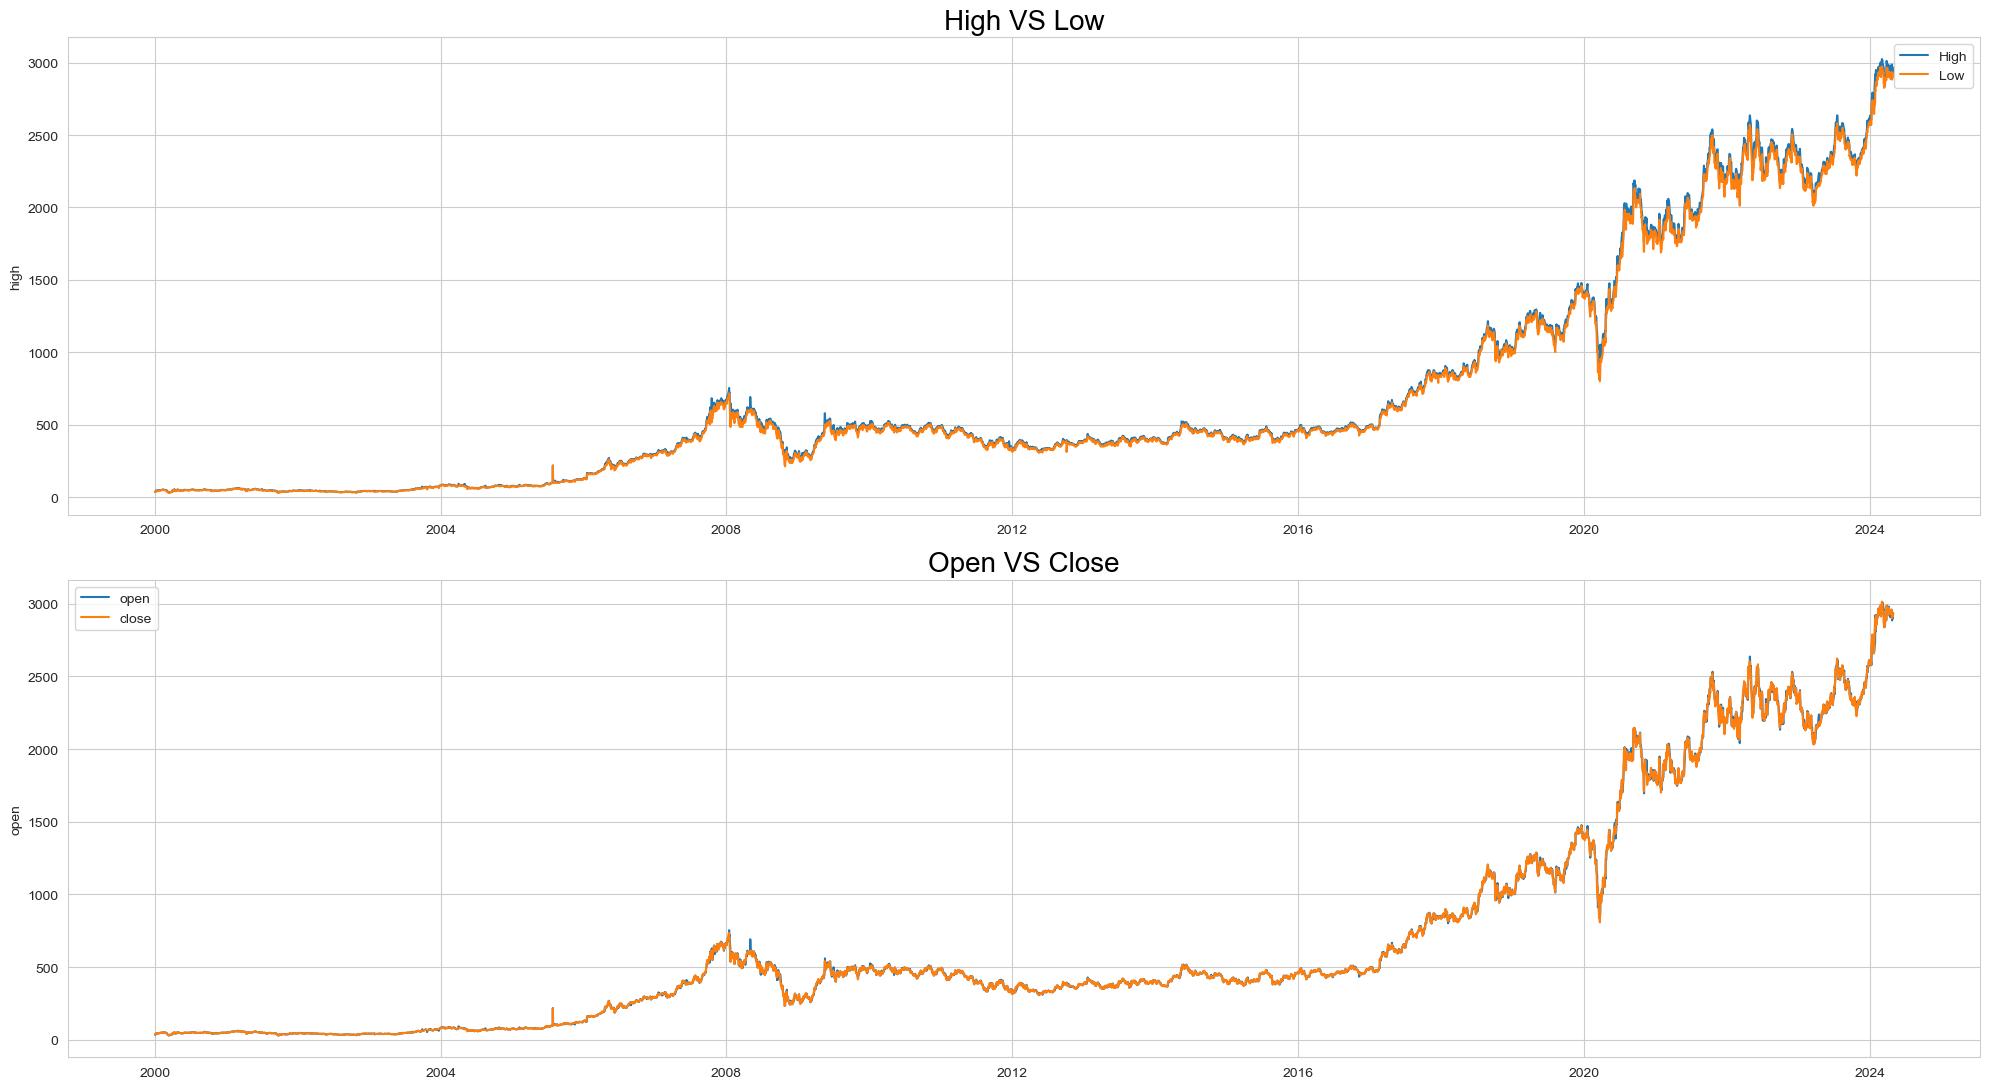

In [21]:
plt.figure(figsize=(20,11))

plt.subplot(211)
sns.lineplot(new_df['high'],label='High')
sns.lineplot(new_df['low'],label='Low')
plt.title('High VS Low',fontdict={'fontsize':20,'color':'black'})

plt.subplot(212)
sns.lineplot(new_df['open'],label='open')
sns.lineplot(new_df['close'],label='close')
plt.title('Open VS Close',fontdict={'fontsize':20,'color':'black'})

plt.legend(loc='best')
plt.tight_layout()

In [22]:
mnth=pd.DataFrame(new_df.groupby('month').mean())
yer=pd.DataFrame(new_df.groupby('year').mean())
dy=pd.DataFrame(new_df.groupby('day').mean())

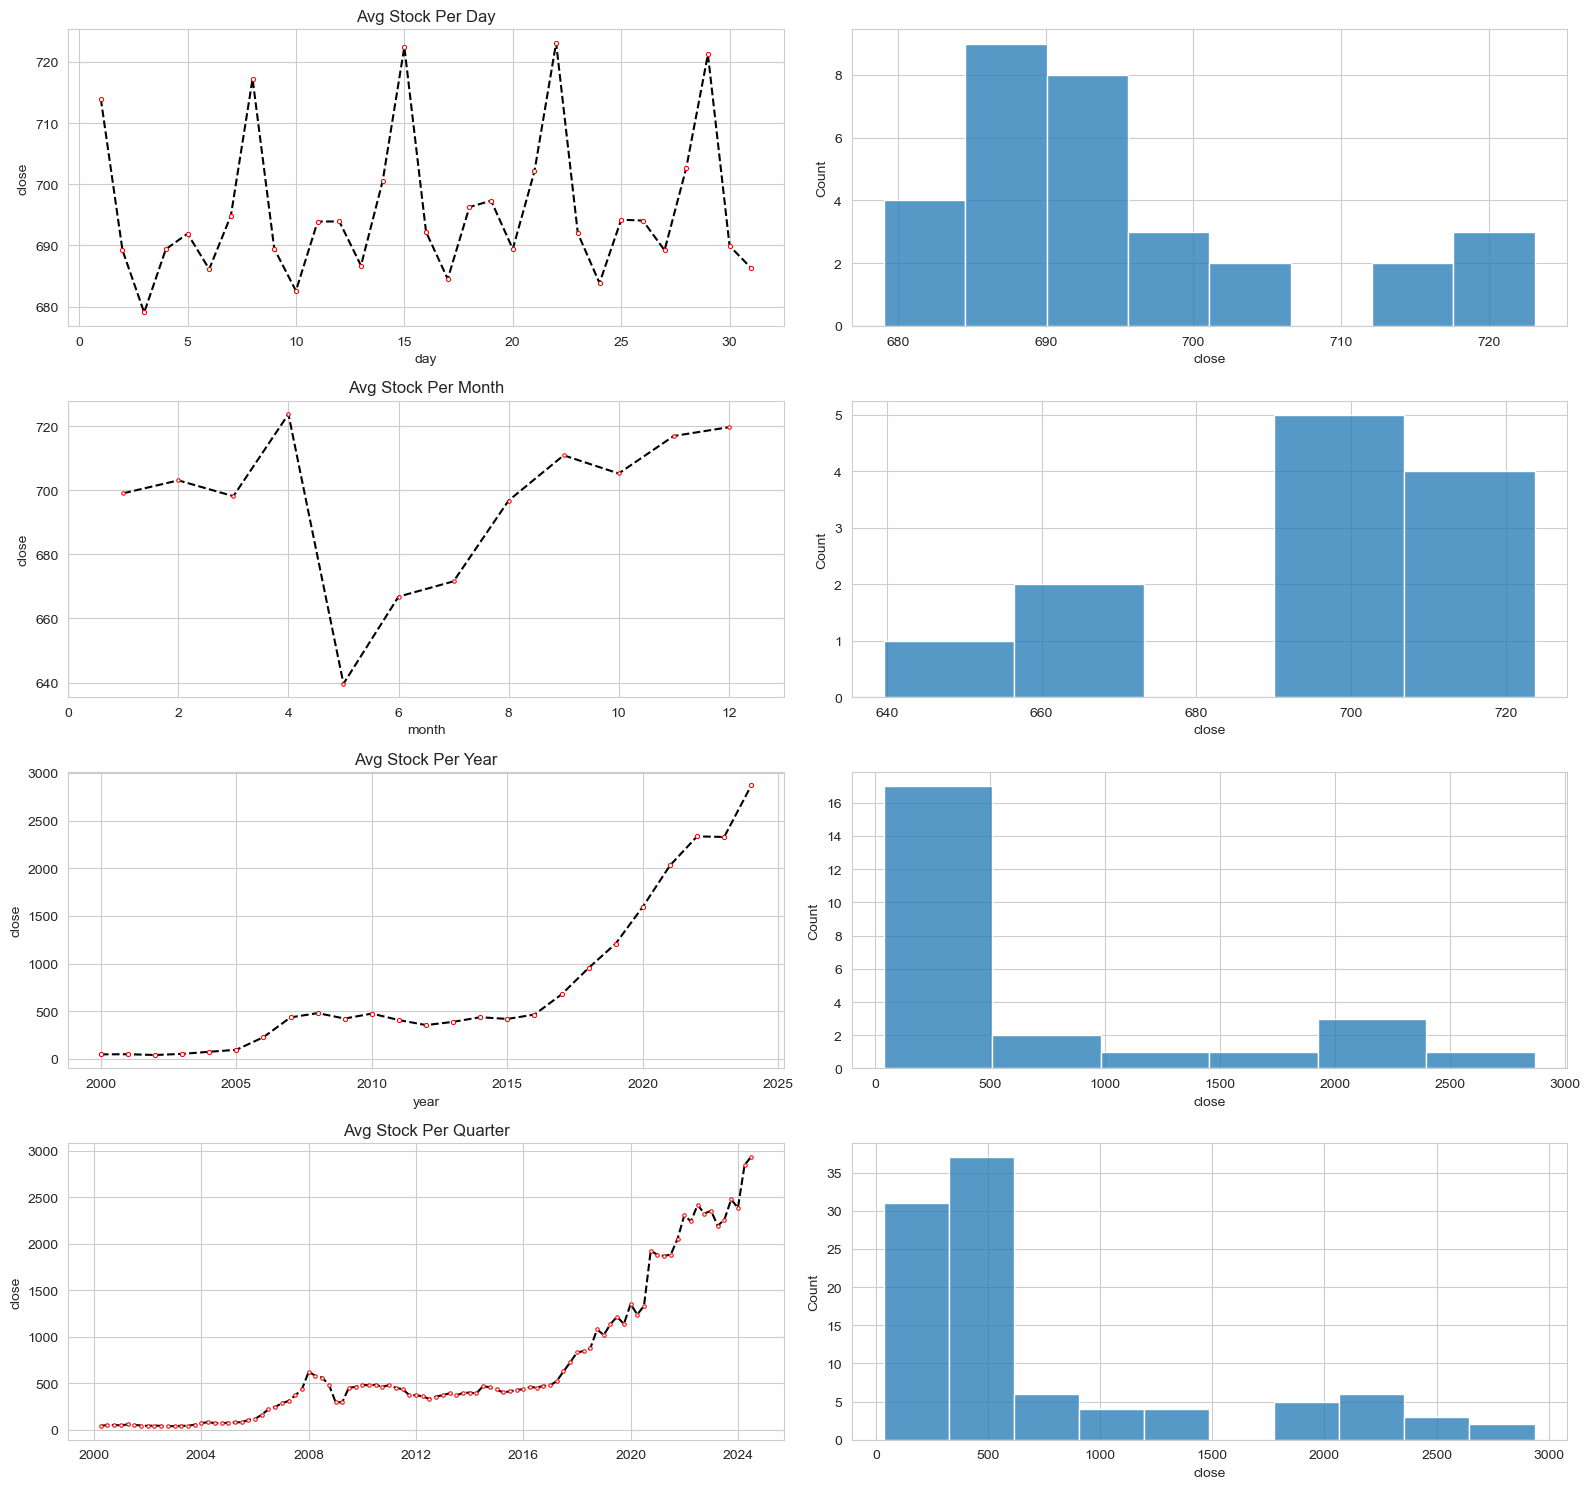

In [23]:
plt.figure(figsize=(16,15))

plt.subplot(421)
sns.lineplot(data=dy['close'], marker='.', linestyle='dashed', markeredgecolor='red', markerfacecolor='white', markersize=6, color='black')
plt.title('Avg Stock Per Day')

plt.subplot(422)
sns.histplot(data=dy['close'])
plt.tight_layout()

plt.subplot(423)
sns.lineplot(data=mnth['close'], marker='.', linestyle='dashed', markeredgecolor='red', markerfacecolor='white', markersize=5, color='black')
plt.xlim(0, 13)
plt.title('Avg Stock Per Month')

plt.subplot(424)
sns.histplot(data=mnth['close'])

plt.subplot(425)
sns.lineplot(data=yer['close'], marker='.', linestyle='dashed', markeredgecolor='red', markerfacecolor='white', markersize=6, color='black')
plt.title('Avg Stock Per Year')

plt.subplot(426)
sns.histplot(data=yer['close'])

plt.subplot(427)
quater = new_df['close'].resample('Q')
quater_mean = quater.mean()
sns.lineplot(data=quater_mean, marker='.', linestyle='dashed', markeredgecolor='red', markerfacecolor='white', markersize=5, color='black')
plt.title('Avg Stock Per Quarter')

plt.subplot(428)
sns.histplot(data=quater_mean)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Box Plot For Each Year')

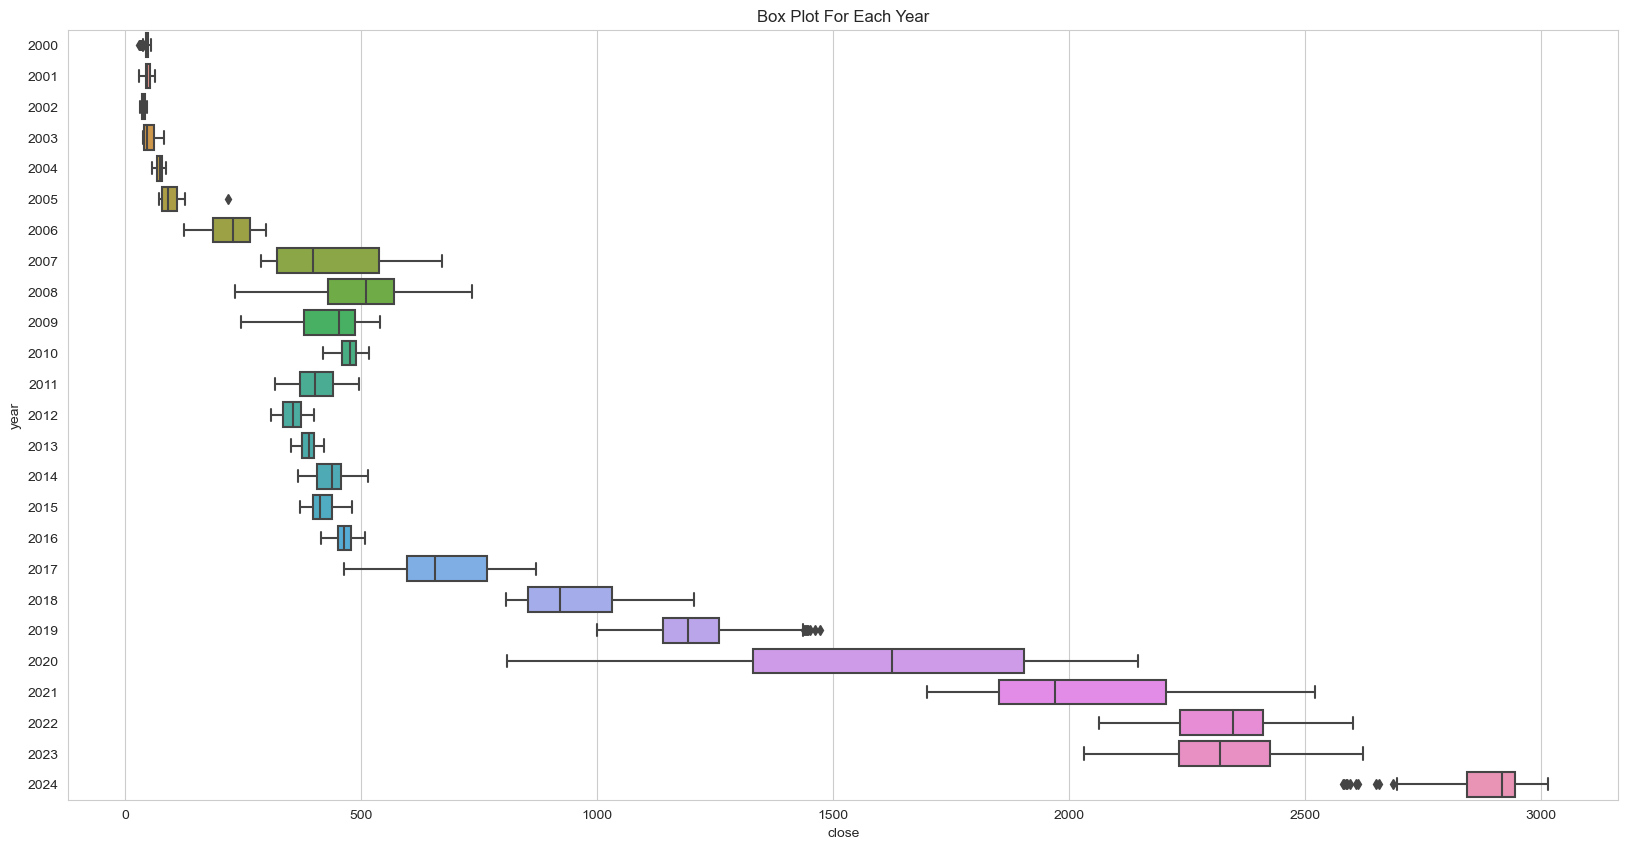

In [24]:
plt.figure(figsize=(20,10))
sns.boxplot(y='year',x='close',data=new_df,orient='h')
plt.title('Box Plot For Each Year')

Text(0.5, 1.0, 'Avg Stock based on Month-Year')

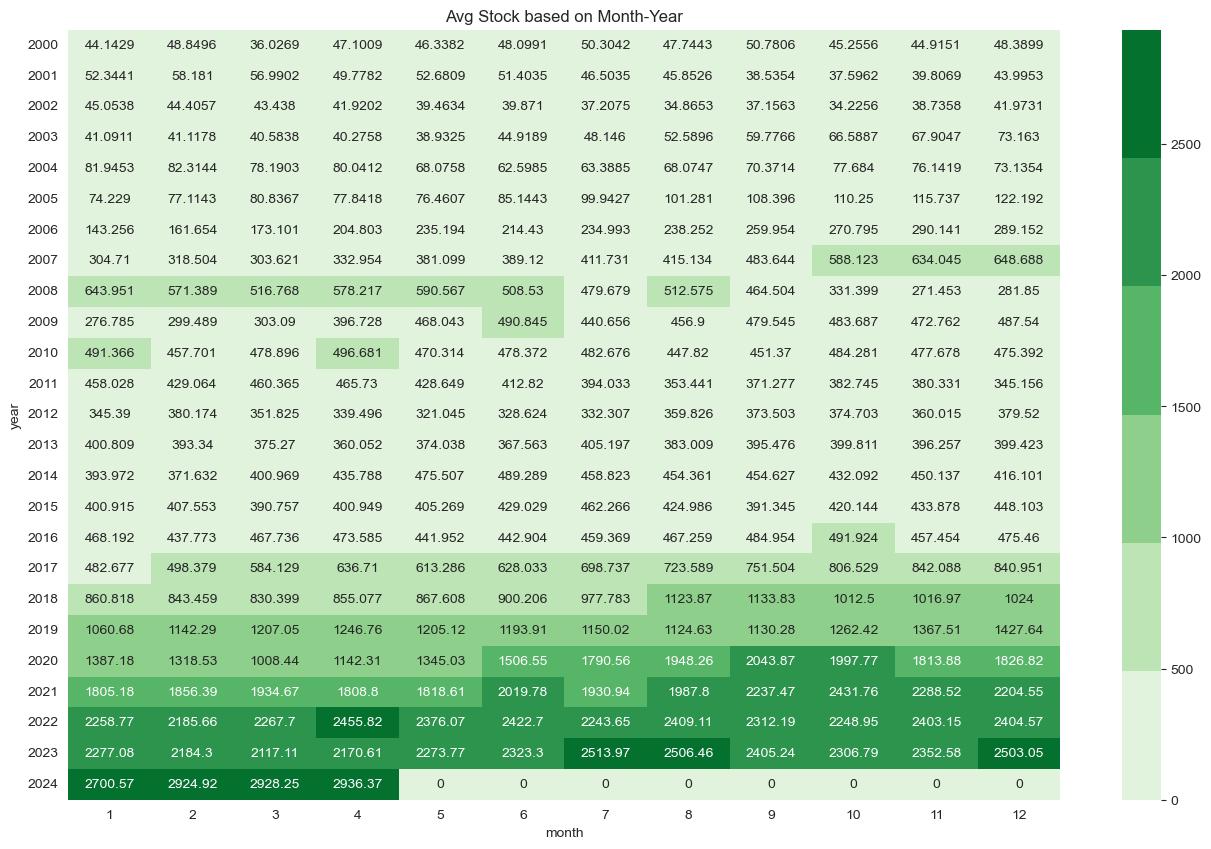

In [25]:
pivotym=pd.pivot_table(index='year',columns='month',values='close',data=new_df,fill_value=0)
plt.figure(figsize=(16,10))
colormap = sns.color_palette("Greens")
sns.heatmap(pivotym,annot=True,fmt='g',cmap=colormap)
plt.title('Avg Stock based on Month-Year')

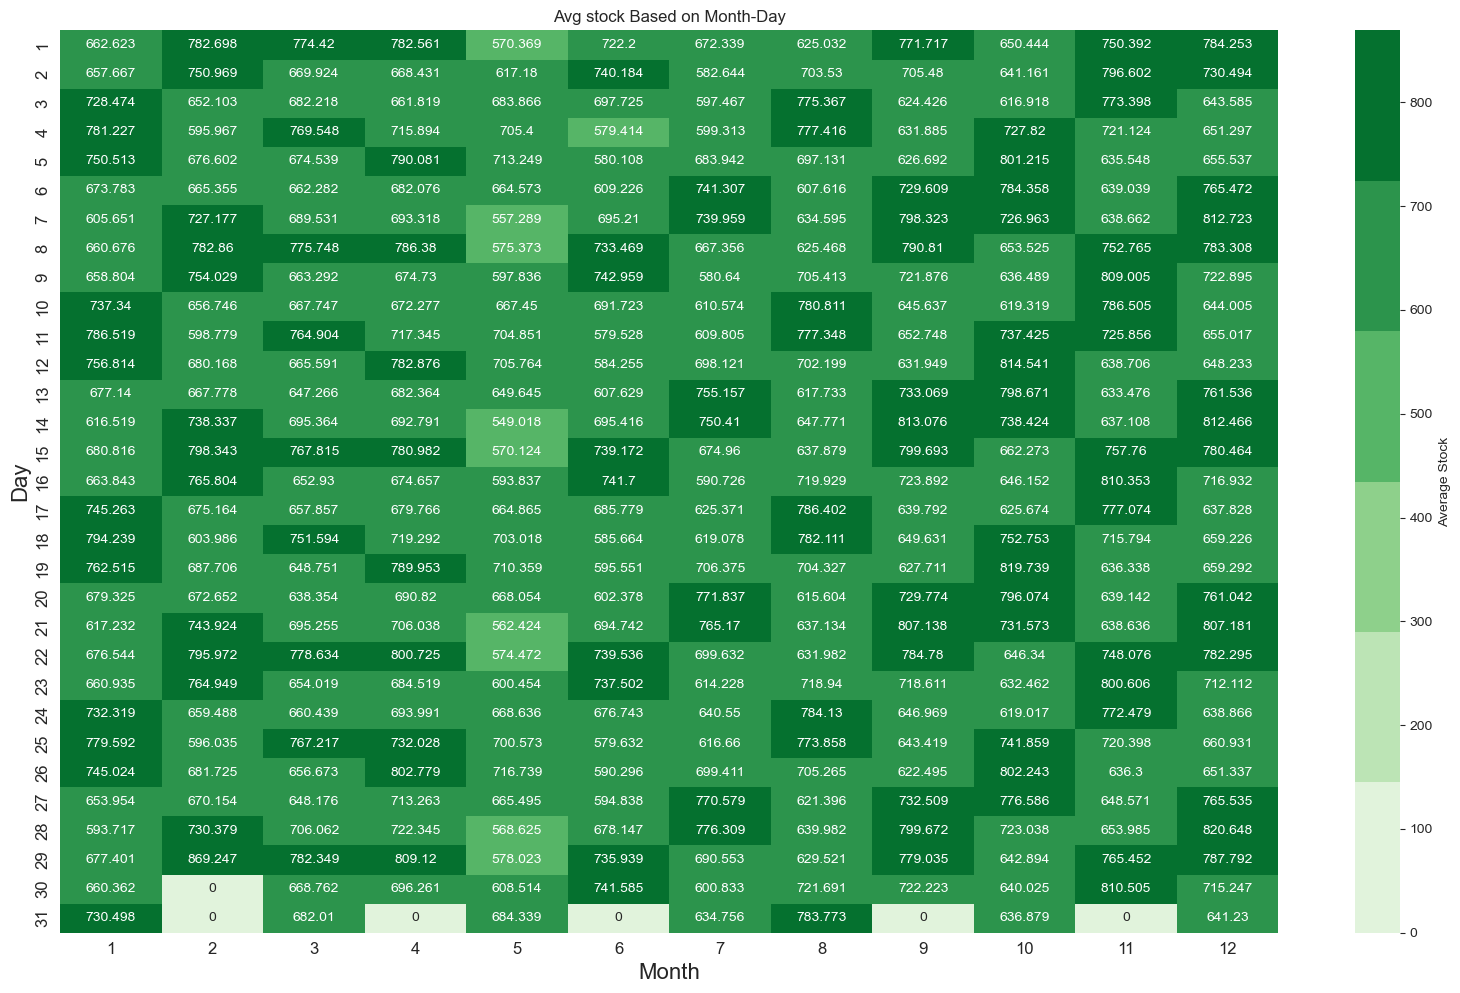

In [26]:
pivotmd=pd.pivot_table(columns='month',index='day',values='close',data=new_df,fill_value=0)
plt.figure(figsize=(16,10))
colormap = sns.color_palette("Greens")
sns.heatmap(pivotmd,annot=True,fmt='g',cmap=colormap,cbar_kws={'label': 'Average Stock'})
plt.title('Avg stock Based on Month-Day')
plt.xlabel('Month', fontsize=16)
plt.ylabel('Day', fontsize=16)
plt.tight_layout()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## check whether the data is stationary or not

### Adfuller

In [27]:
def adf_test(data):
    ##ho: data is not stationary
    ##h1: data is stationary
    if adfuller(data)[1]>0.05:
        print('fail to reject null hypothesis(accept ho), so data is not stationary')
    else:
        print('reject null hypothesis(reject ho), so data is  stationary')
        

### 1.Raw Data

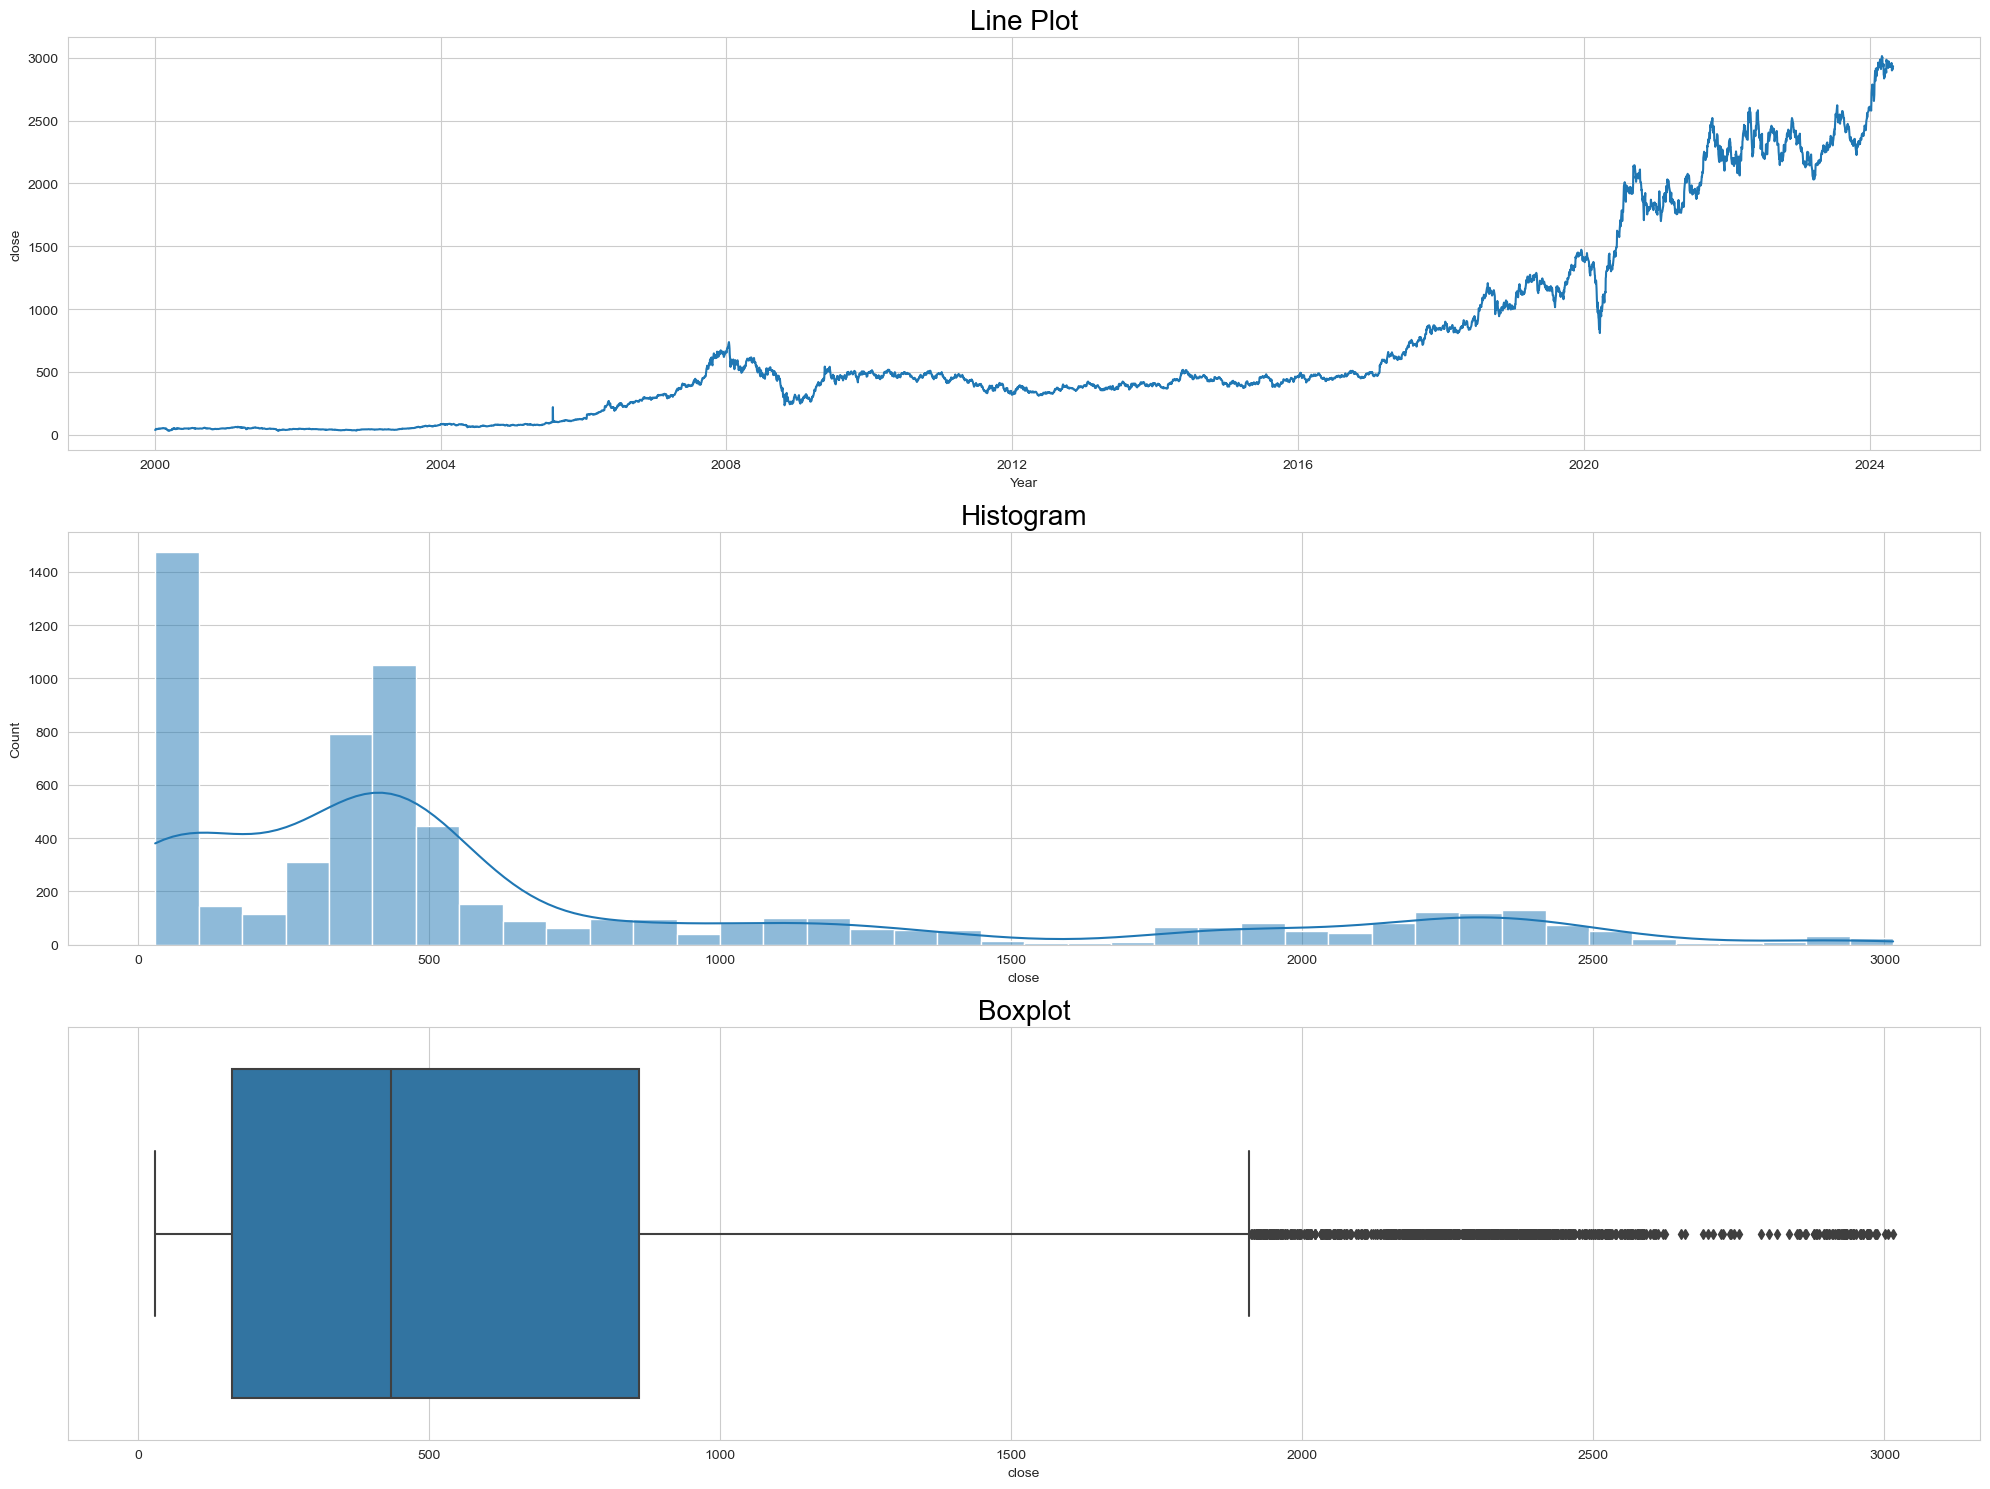

In [28]:
plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(new_df['close'])
plt.title('Line Plot',fontdict={'fontsize':20,'color':'black'})
plt.xlabel('Year')
plt.subplot(312)
sns.histplot(new_df['close'],kde=True)
plt.title('Histogram',fontdict={'fontsize':20,'color':'black'})
plt.subplot(313)
sns.boxplot(x=new_df['close'])
plt.title('Boxplot',fontdict={'fontsize':20,'color':'black'})
plt.tight_layout()
plt.show()

In [29]:
adf_test(new_df['close'])

fail to reject null hypothesis(accept ho), so data is not stationary


## Transformations

### 2 Log data

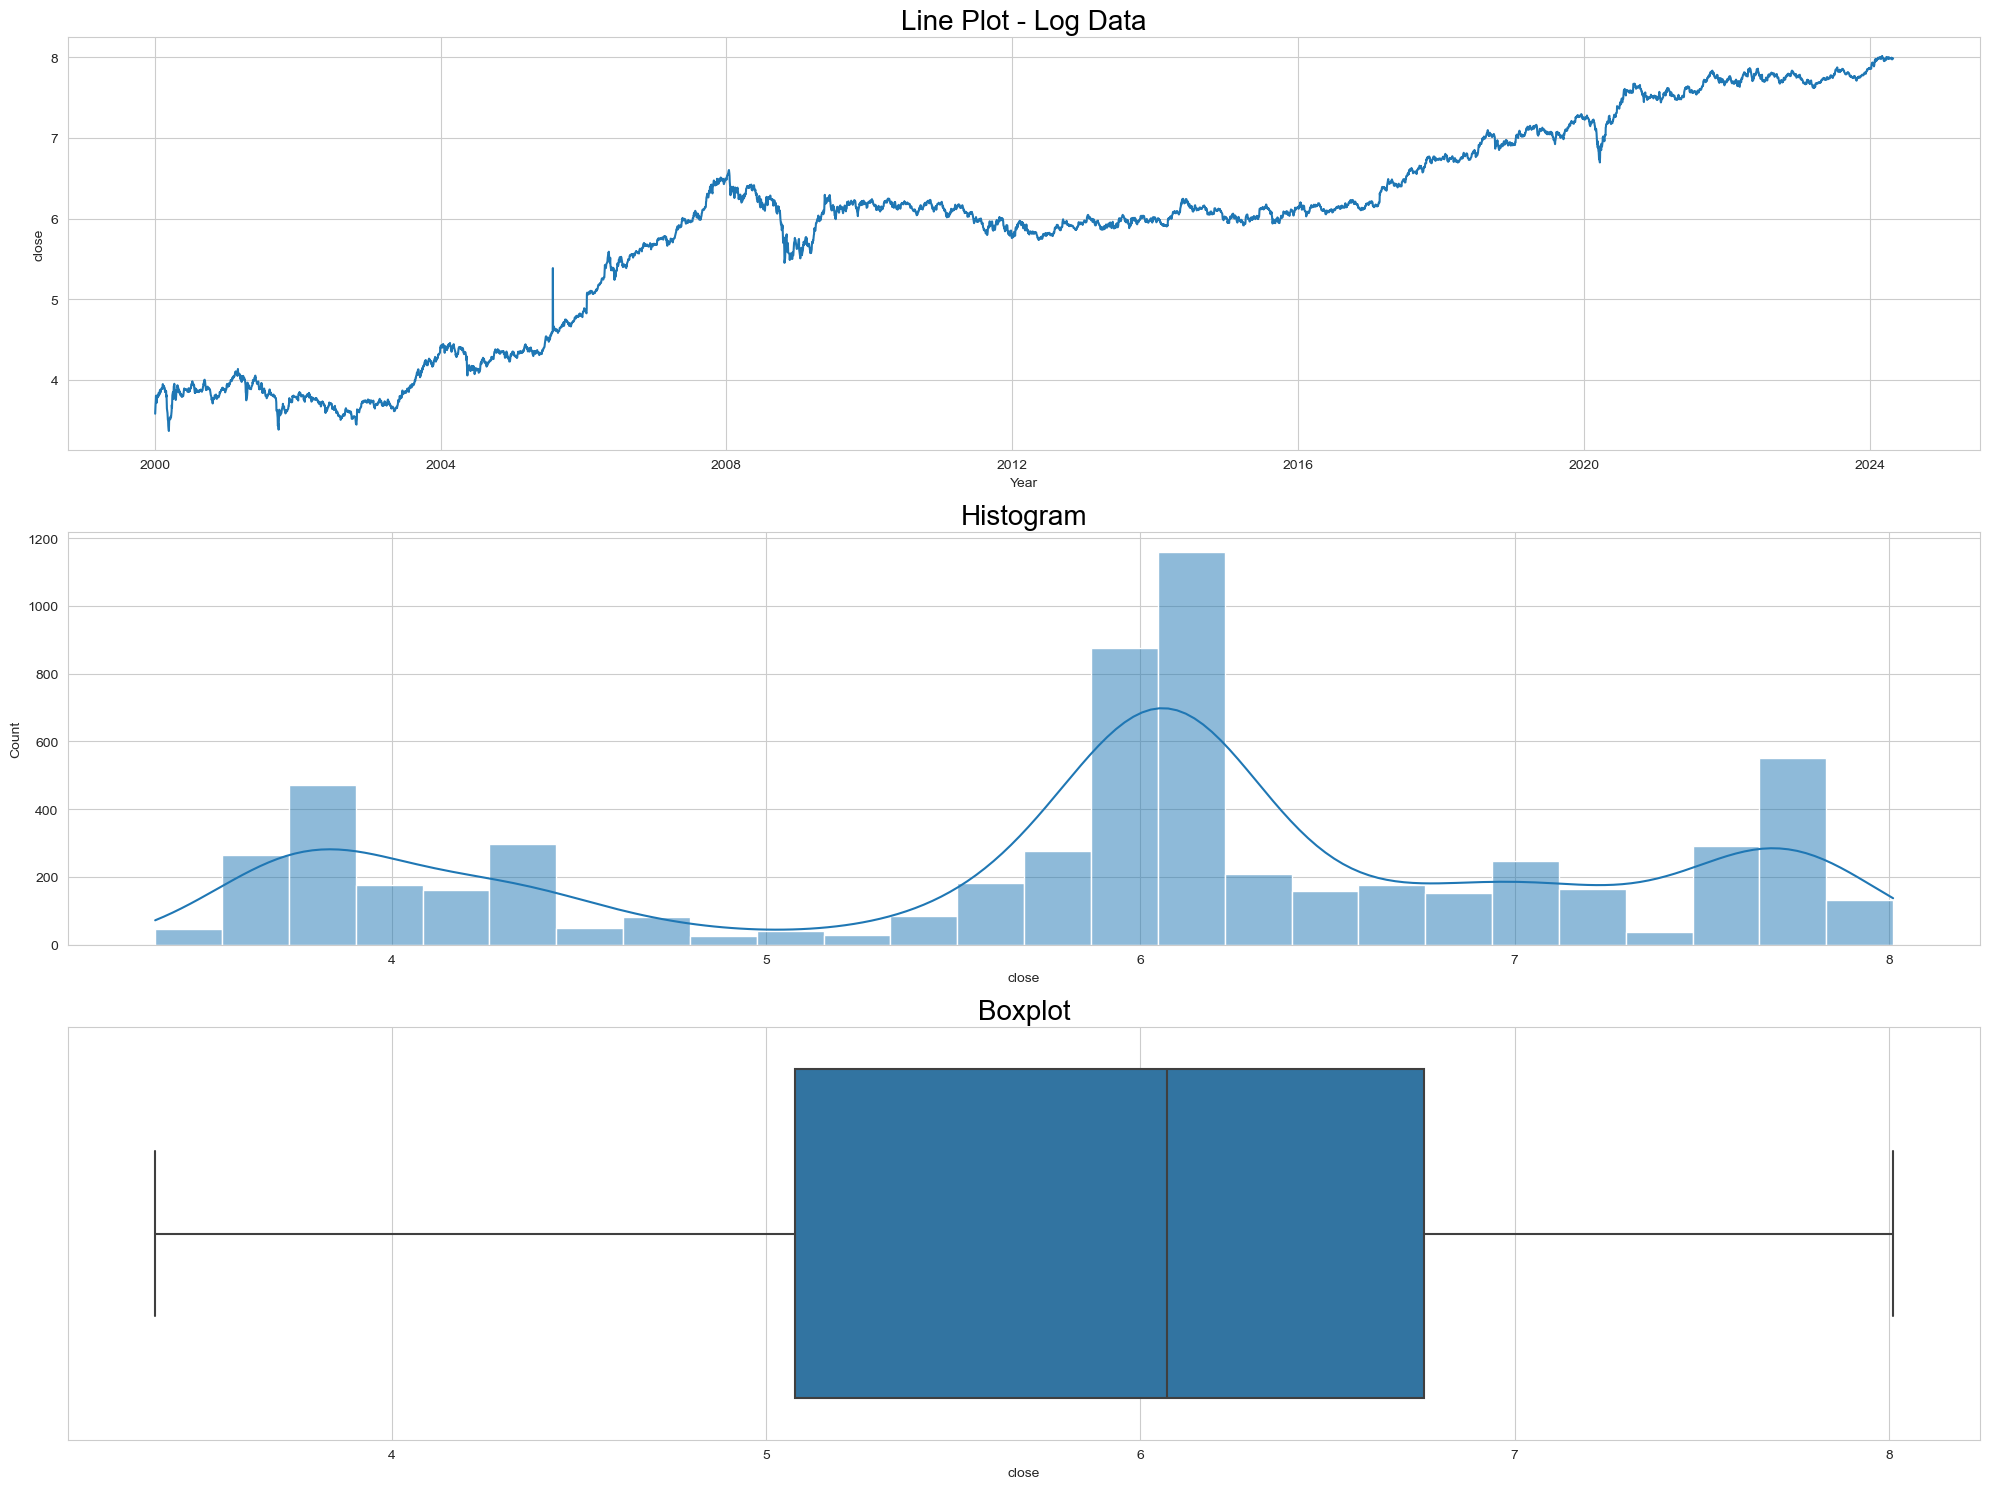

In [30]:
plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(np.log(new_df['close']))
plt.title('Line Plot - Log Data',fontdict={'fontsize':20,'color':'black'})
plt.xlabel('Year')
plt.subplot(312)
sns.histplot(np.log(new_df['close']),kde=True)
plt.title('Histogram',fontdict={'fontsize':20,'color':'black'})
plt.subplot(313)
sns.boxplot(x=np.log(new_df['close']))
plt.title('Boxplot',fontdict={'fontsize':20,'color':'black'})
plt.tight_layout()
plt.show()

In [31]:
adf_test(np.log(new_df['close']))

fail to reject null hypothesis(accept ho), so data is not stationary


### 3 SQRT data

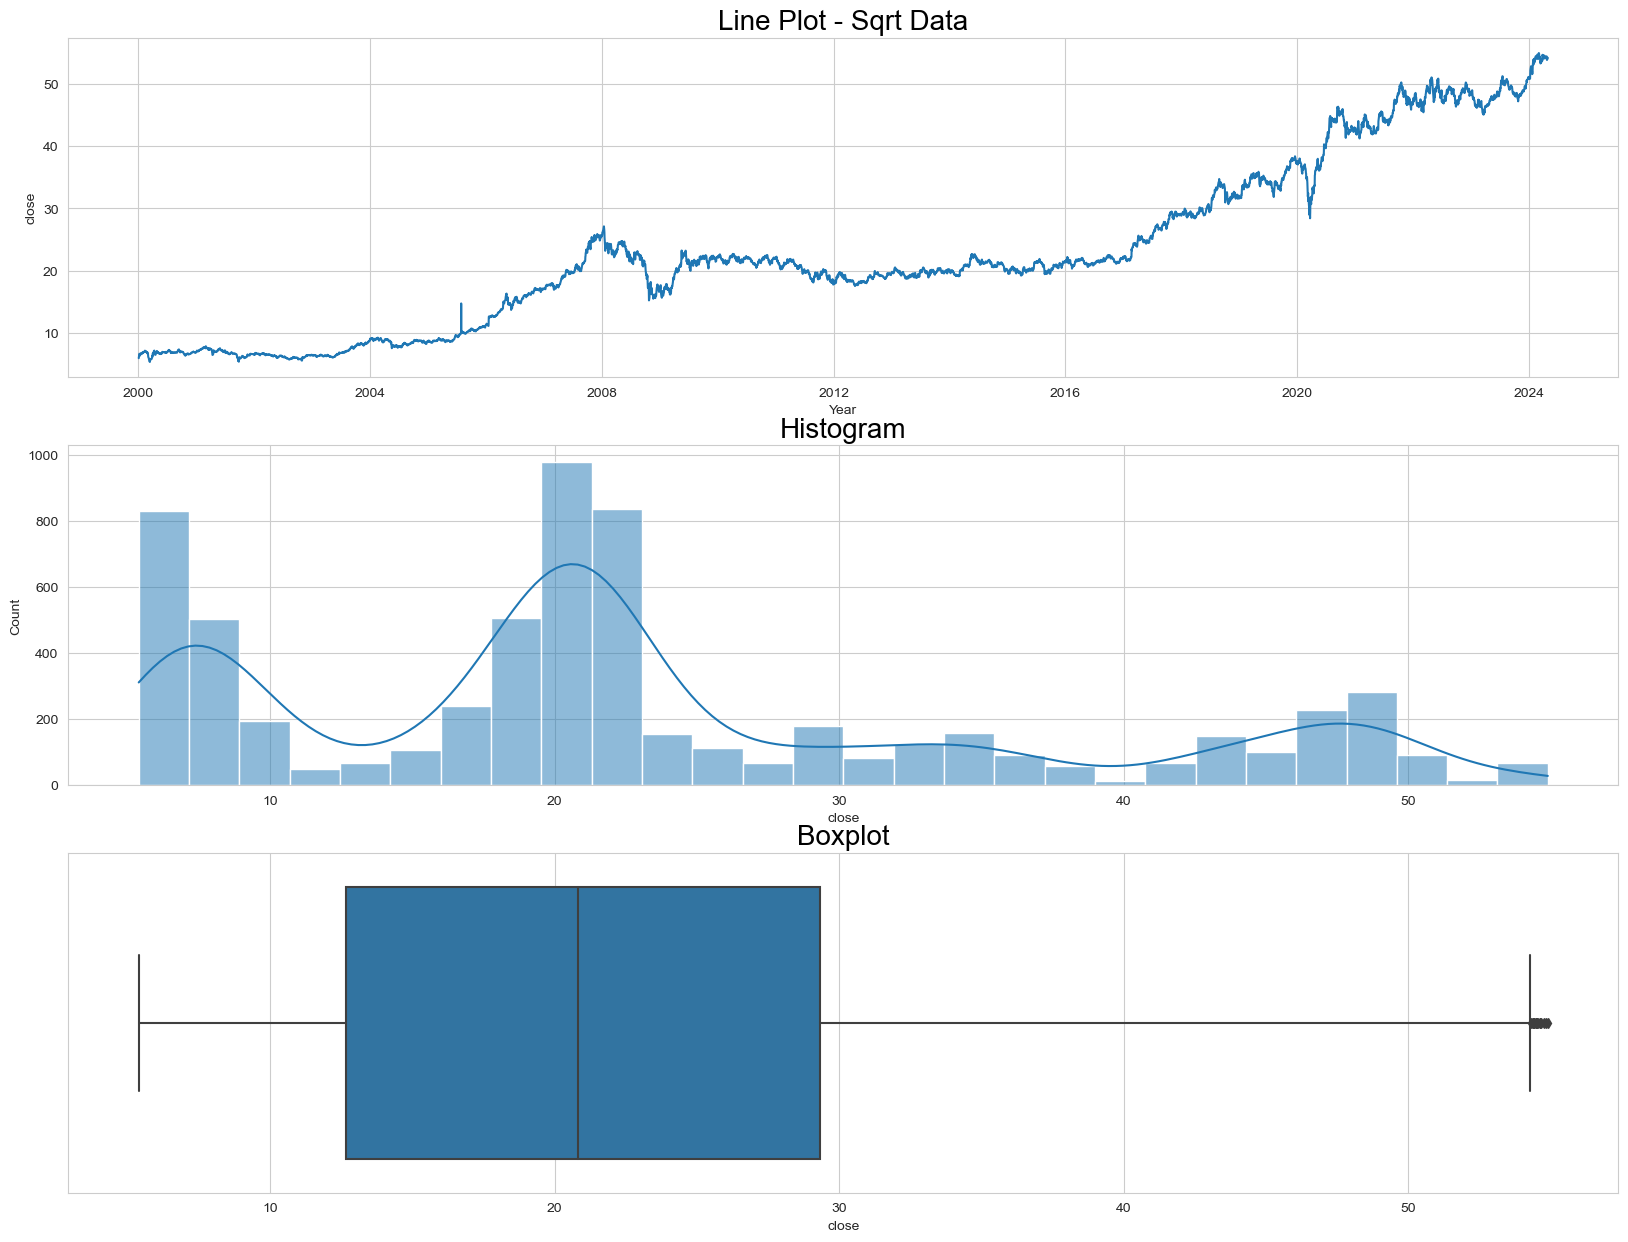

In [32]:
plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(np.sqrt(new_df['close']))
plt.title('Line Plot - Sqrt Data',fontdict={'fontsize':20,'color':'black'})
plt.xlabel('Year')
plt.subplot(312)
sns.histplot(np.sqrt(new_df['close']),kde=True)
plt.title('Histogram',fontdict={'fontsize':20,'color':'black'})
plt.subplot(313)
sns.boxplot(x=np.sqrt(new_df['close']))
plt.title('Boxplot',fontdict={'fontsize':20,'color':'black'})
plt.show()


In [33]:
adf_test(np.sqrt(new_df['close']))

fail to reject null hypothesis(accept ho), so data is not stationary


### 3 Cubrt Data

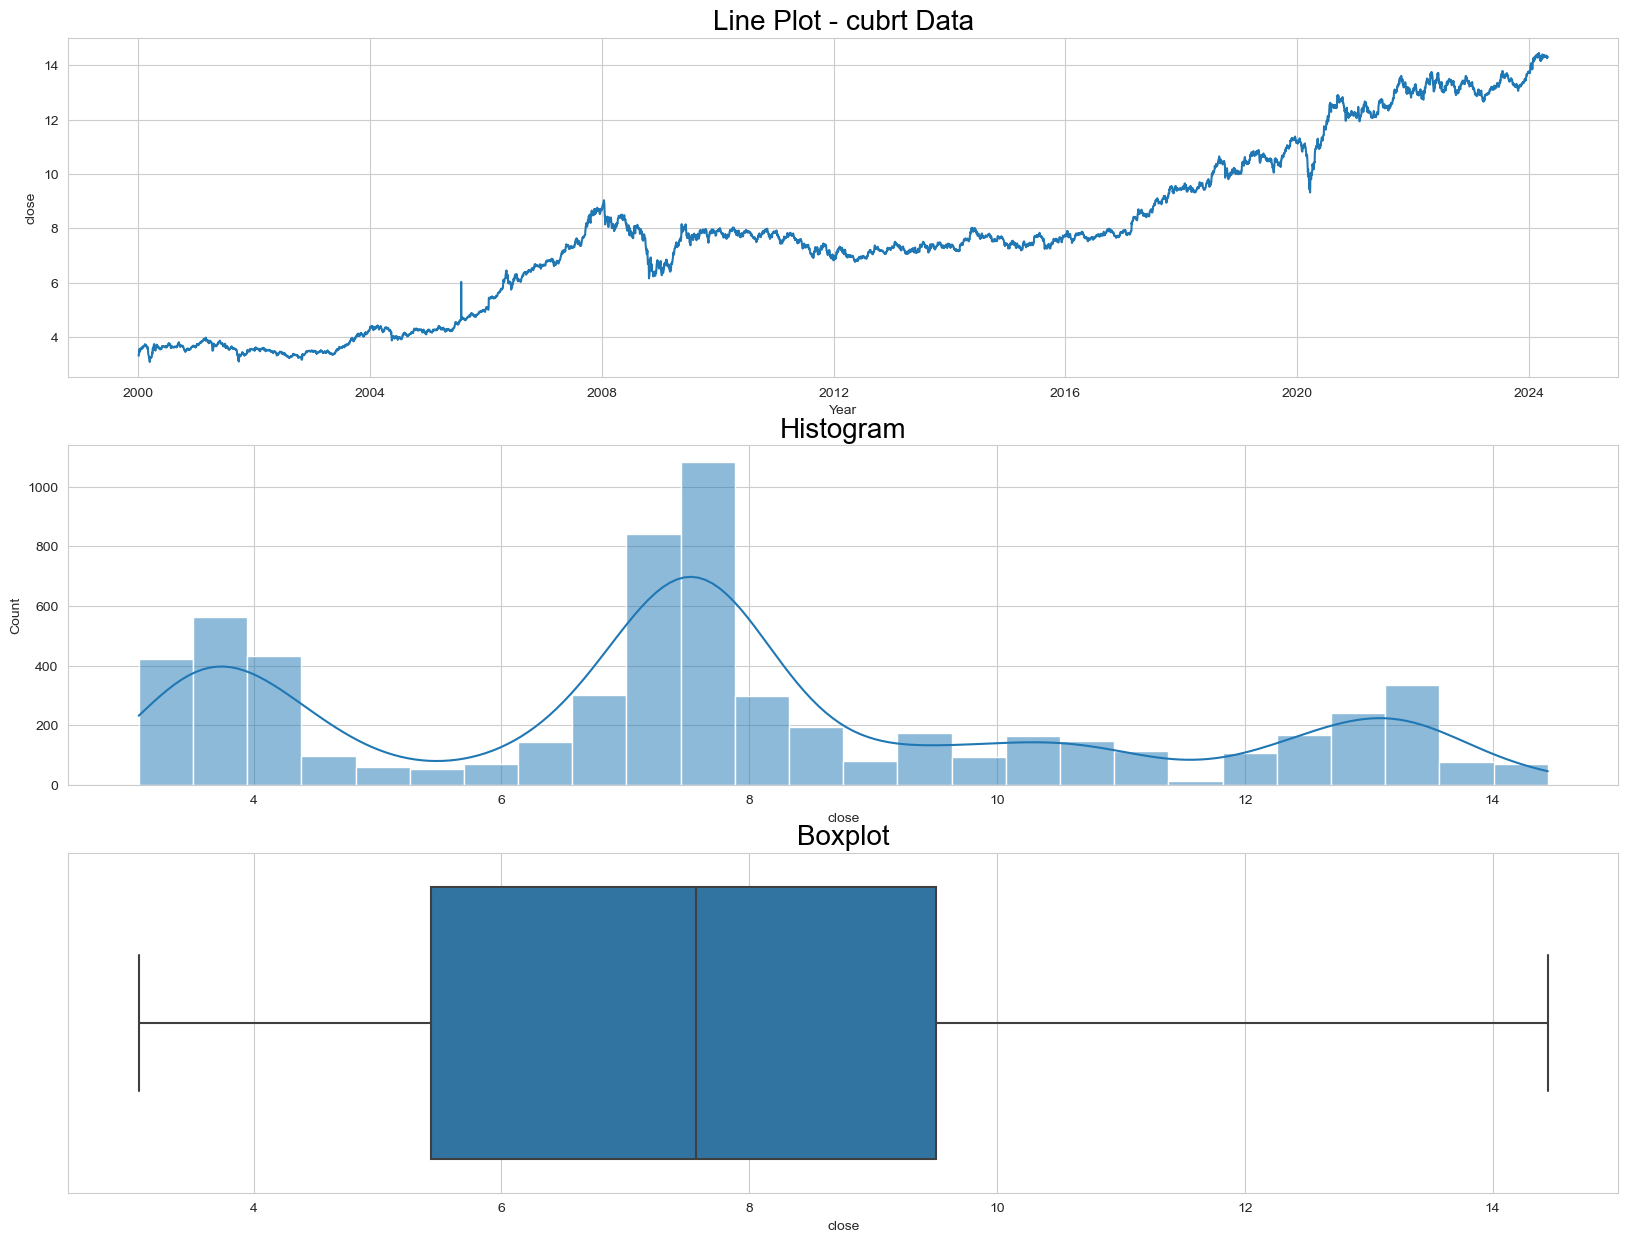

In [34]:
plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(np.cbrt(new_df['close']))
plt.title('Line Plot - cubrt Data',fontdict={'fontsize':20,'color':'black'})
plt.xlabel('Year')
plt.subplot(312)
sns.histplot(np.cbrt(new_df['close']),kde=True)
plt.title('Histogram',fontdict={'fontsize':20,'color':'black'})
plt.subplot(313)
sns.boxplot(x=np.cbrt(new_df['close']))
plt.title('Boxplot',fontdict={'fontsize':20,'color':'black'})
plt.show()


In [35]:
adf_test(np.cbrt(new_df['close']))

fail to reject null hypothesis(accept ho), so data is not stationary


### Moving Average

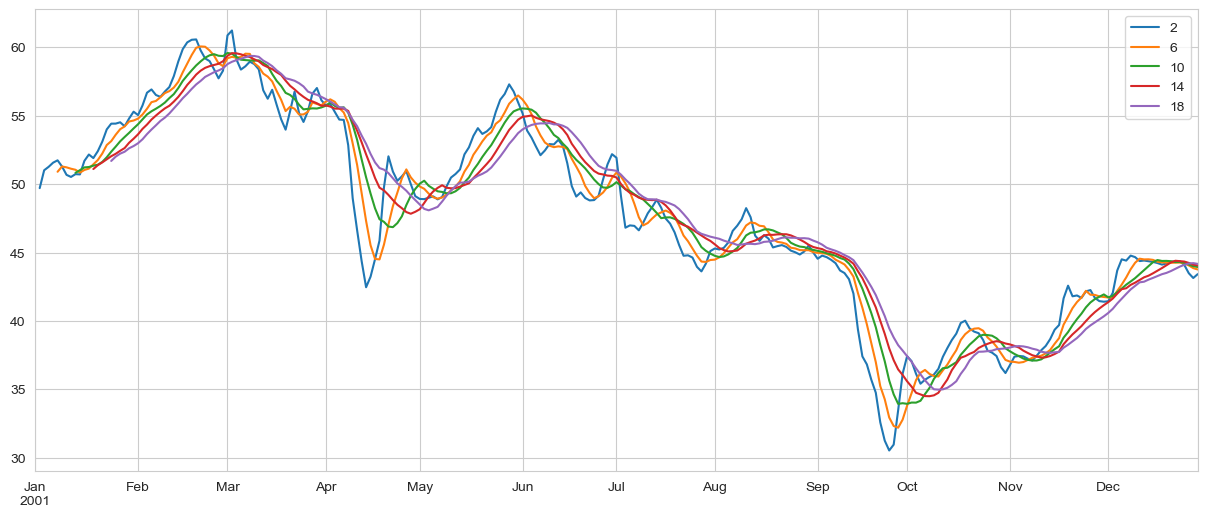

In [36]:
plt.figure(figsize=(15,6))
for i in range(2,20,4):
    new_df['close'][new_df['year']==2001].rolling(i).mean().plot(label=str(i))
plt.legend()
plt.show()

In [37]:
for i in range(2,30,4):
    adf_test(new_df['close'].rolling(i).mean().dropna())

fail to reject null hypothesis(accept ho), so data is not stationary
fail to reject null hypothesis(accept ho), so data is not stationary
fail to reject null hypothesis(accept ho), so data is not stationary
fail to reject null hypothesis(accept ho), so data is not stationary
fail to reject null hypothesis(accept ho), so data is not stationary
fail to reject null hypothesis(accept ho), so data is not stationary
fail to reject null hypothesis(accept ho), so data is not stationary


### Differencing

In [38]:
new=new_df['close'].diff()
new=new.dropna()

In [39]:
new

2000-01-04     2.877663
2000-01-05     1.520950
2000-01-06     1.692326
2000-01-07     2.884804
2000-01-10    -0.864014
                ...    
2024-04-24   -18.299805
2024-04-25    19.599854
2024-04-26   -14.849854
2024-04-29    24.949951
2024-04-30     3.949951
Freq: B, Name: close, Length: 6346, dtype: float64

In [40]:
adf_test(new)

reject null hypothesis(reject ho), so data is  stationary


<Axes: >

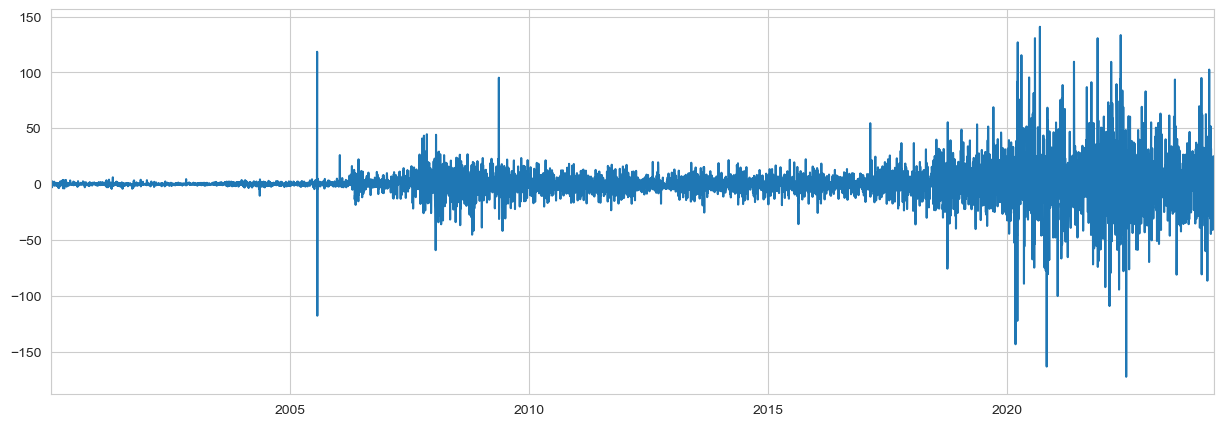

In [41]:
plt.figure(figsize=(15,5))
new.plot()

### Seasonal Diffferencing

In [42]:
new2=new_df['close'].diff(5)

In [43]:
new2.head(10)

2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
2000-01-10    8.111729
2000-01-11    2.377823
2000-01-12    2.741993
2000-01-13    2.499210
2000-01-14    0.249924
Freq: B, Name: close, dtype: float64

In [44]:
new2=new2.dropna()

In [45]:
adf_test(new2)

reject null hypothesis(reject ho), so data is  stationary


<Axes: >

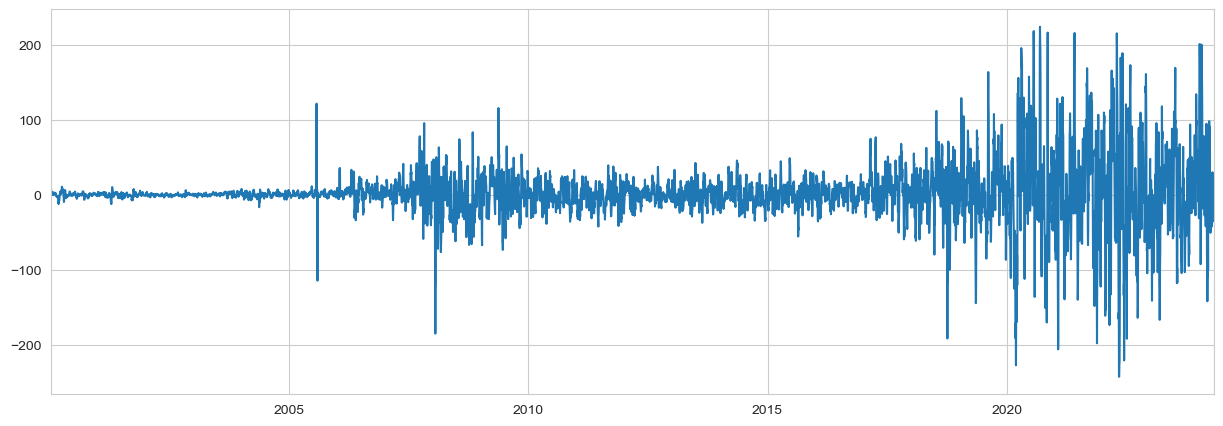

In [46]:
plt.figure(figsize=(15,5))
new2.plot()

### Seasonal Decompose

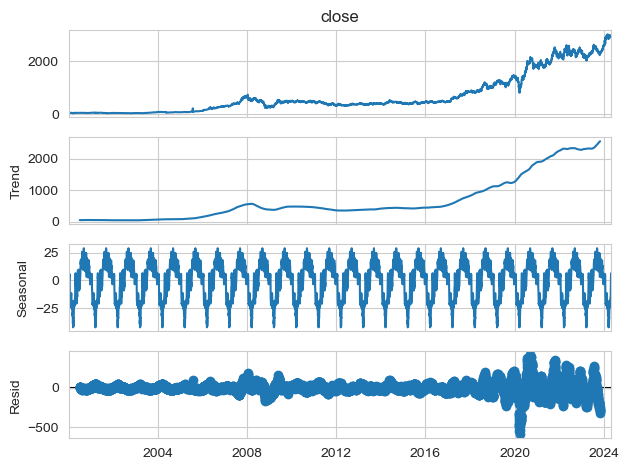

In [47]:
decompose=seasonal_decompose(new_df['close'],period=261)
decompose.plot()
plt.show()

#### Multiplicative

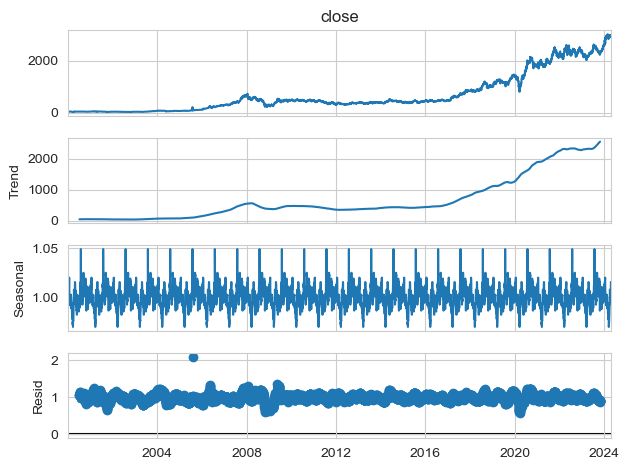

In [48]:
decomp1=seasonal_decompose(new_df['close'],period=261,model='multiplicative')
decomp1.plot()
plt.show()

In [49]:
mul_df=pd.concat([decomp1.seasonal,decomp1.trend,decomp1.resid,decomp1.observed],axis=1)
mul_df.columns=['seasonality','trend','resid','actual']

In [50]:
mul_df.head(200)

,seasonality,trend,resid,actual
2000-01-03,1.010215,NaN,NaN,35.945827
2000-01-04,1.008398,NaN,NaN,38.823490
2000-01-05,1.012778,NaN,NaN,40.344440
2000-01-06,1.010074,NaN,NaN,42.036766
2000-01-07,1.011808,NaN,NaN,44.921570
...,...,...,...,...
2000-10-02,1.005681,49.670432,0.979191,48.913174
2000-10-03,1.000865,49.704493,0.985095,49.006001
2000-10-04,1.005999,49.748678,0.989184,49.505840
2000-10-05,1.002045,49.792917,0.973601,48.577564


#### seasonality * trend * resid = actual

#### additive

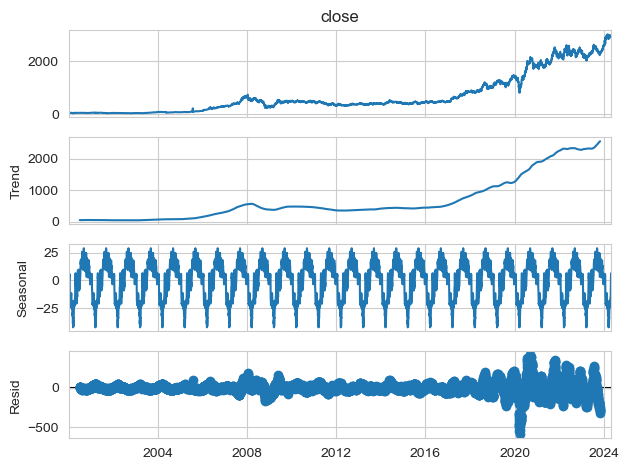

In [51]:
decomp2=seasonal_decompose(new_df['close'],period=261,model='additive')
decomp2.plot()
plt.show()

In [52]:
add_df=pd.concat([decomp2.seasonal,decomp2.trend,decomp2.resid,decomp2.observed],axis=1)
add_df.columns=['seasonality','trend','resid','actual']

In [53]:
add_df.head(200)

,seasonality,trend,resid,actual
2000-01-03,0.859300,NaN,NaN,35.945827
2000-01-04,-0.673279,NaN,NaN,38.823490
2000-01-05,2.612247,NaN,NaN,40.344440
2000-01-06,2.165563,NaN,NaN,42.036766
2000-01-07,0.353702,NaN,NaN,44.921570
...,...,...,...,...
2000-10-02,12.837624,49.670432,-13.594882,48.913174
2000-10-03,7.989274,49.704493,-8.687767,49.006001
2000-10-04,13.300670,49.748678,-13.543507,49.505840
2000-10-05,13.182265,49.792917,-14.397617,48.577564


#### seasonality +	trend +	resid = actual

## Split The Data

### Non Stationary Data

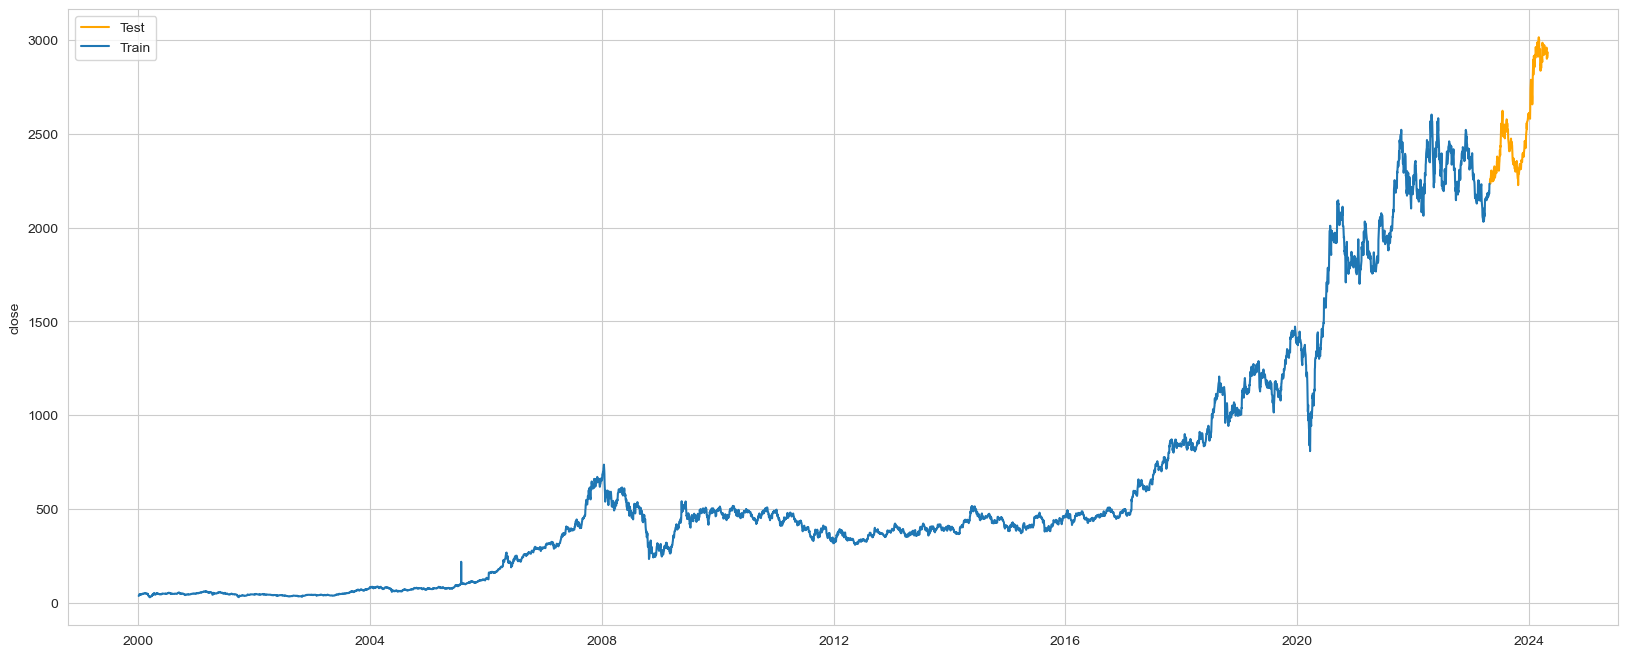

In [54]:
test_ndata=new_df['close'][6085:]
train_ndata=new_df['close'][:6085]
test_len=len(test_ndata)
train_len=len(train_ndata)
plt.figure(figsize=(20,8))
sns.lineplot(test_ndata,label='Test',color='orange')
sns.lineplot(train_ndata,label='Train')
plt.legend()

### Stationary Data

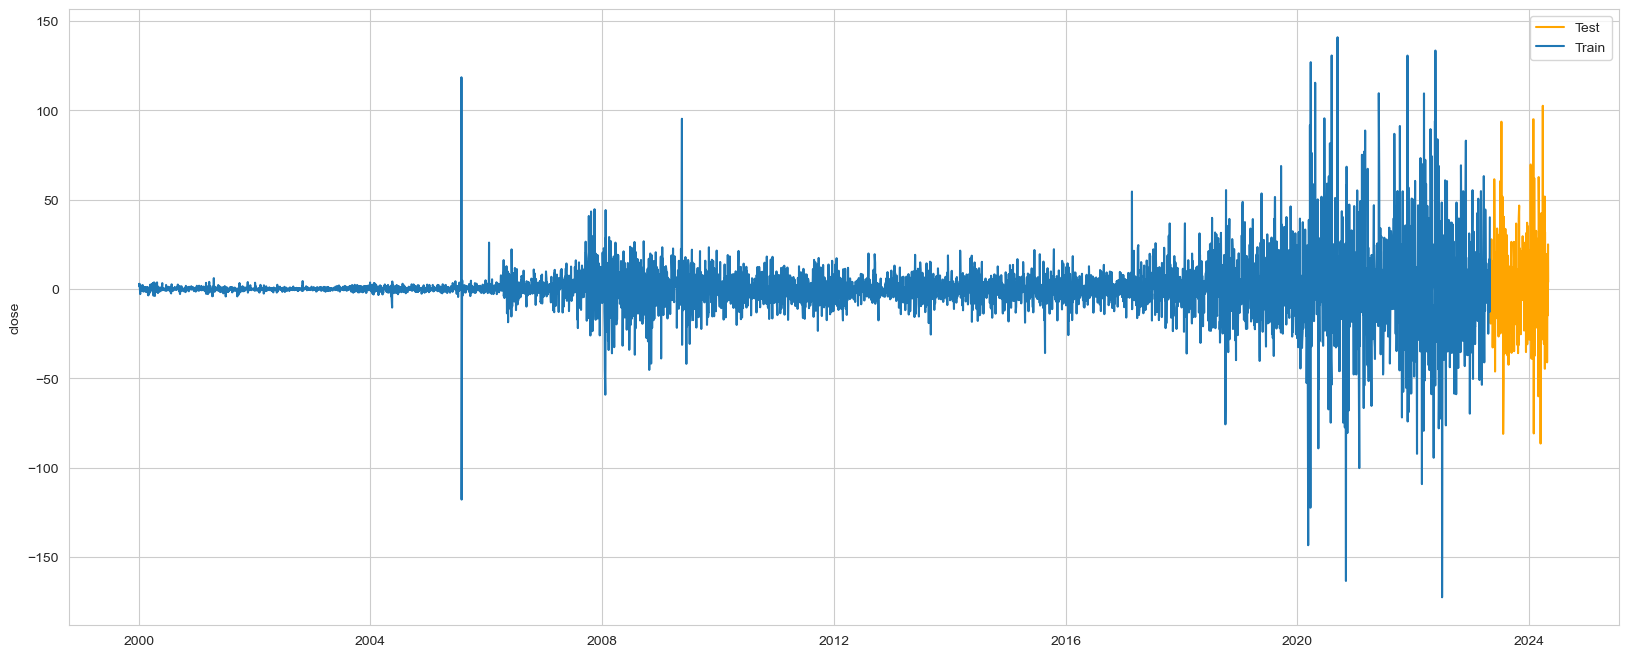

In [55]:
test_sdata=new[6084:]
train_sdata=new[:6084]
plt.figure(figsize=(20,8))
sns.lineplot(test_sdata,label='Test',color='orange')
sns.lineplot(train_sdata,label='Train')
plt.legend()

# Model Buildiing

### Exponential Smoothing


In [56]:
train_ndata

2000-01-03      35.945827
2000-01-04      38.823490
2000-01-05      40.344440
2000-01-06      42.036766
2000-01-07      44.921570
                 ...     
2023-04-24    2176.433350
2023-04-25    2193.093262
2023-04-26    2180.217529
2023-04-27    2194.016357
2023-04-28    2234.120605
Freq: B, Name: close, Length: 6085, dtype: float64

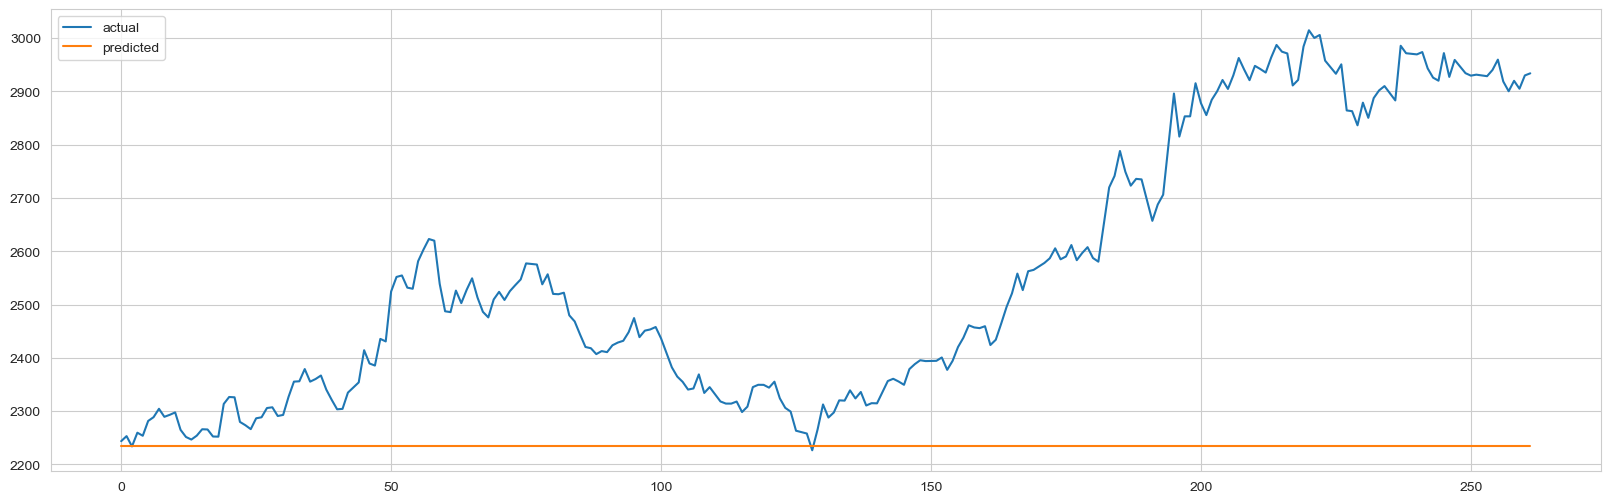

In [57]:
model_simple=SimpleExpSmoothing(train_ndata.values).fit()

s_tt_predt=model_simple.predict(start=train_len,end=(train_len+test_len)-1)
s_tt_mse=mean_squared_error(test_ndata.values,s_tt_predt)
s_tt_rmse=np.sqrt(s_tt_mse)
s_tt_mape=mean_absolute_percentage_error(test_ndata.values,s_tt_predt)

plt.figure(figsize=(20,6))
plt.plot(test_ndata.values,label='actual')
plt.plot(s_tt_predt,label='predicted')
plt.legend()
plt.show()

### Double Exponential Smooting with Trend=MUL

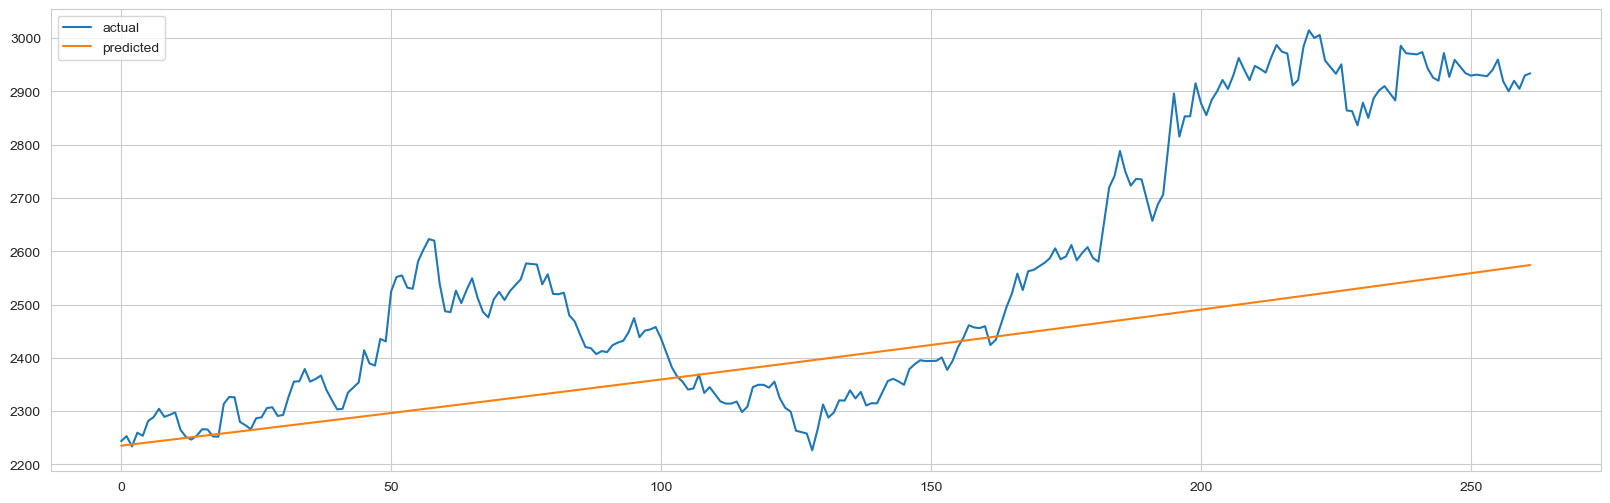

In [58]:
model_double=ExponentialSmoothing(train_ndata.values,trend='mul').fit()
double_mul_test_predict=model_double.predict(start=train_len,end=train_len+test_len-1)
mse_double_mul=mean_squared_error(test_ndata.values,double_mul_test_predict)
rmse_double_mul=np.sqrt(mse_double_mul)
mae_double_mul=mean_absolute_error(test_ndata.values,double_mul_test_predict)
mape_double_mul=mean_absolute_percentage_error(test_ndata.values,double_mul_test_predict)
plt.figure(figsize=(20,6))
plt.plot(test_ndata.values,label='actual')
plt.plot(double_mul_test_predict,label='predicted')
plt.legend()
plt.show()

### Double Exponential Smooting with Trend=ADD

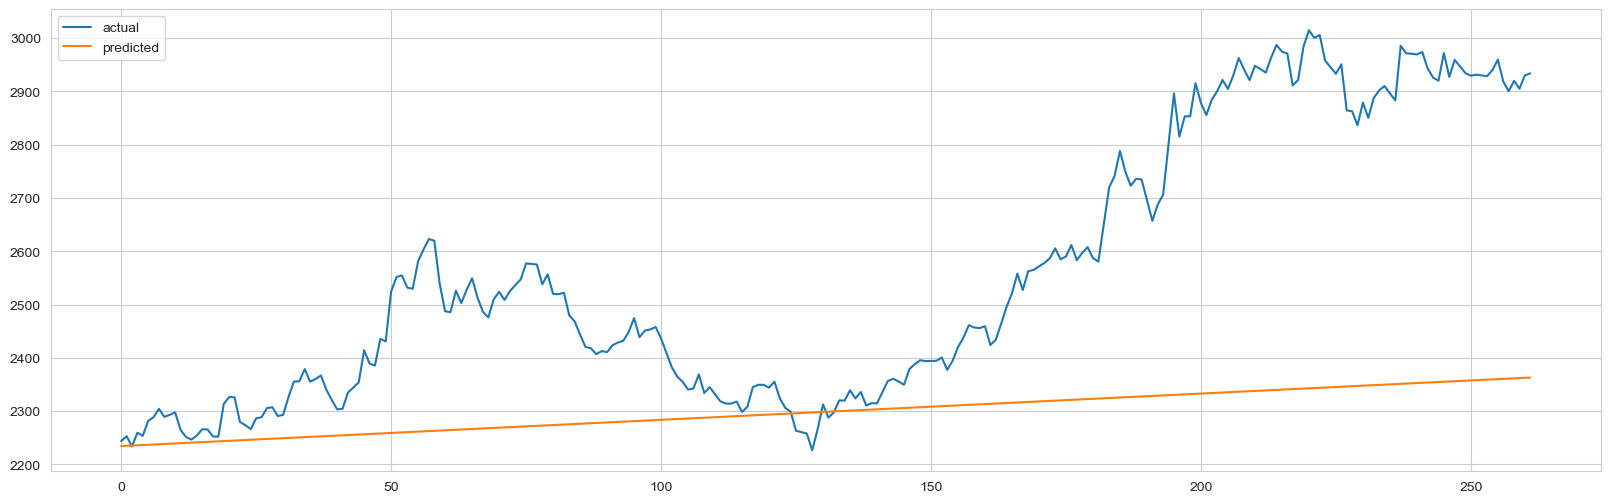

In [59]:
model_double1=ExponentialSmoothing(train_ndata.values,trend='add').fit()
double1_add_test_predict=model_double1.predict(start=train_len,end=train_len+test_len-1)
mse_double1_add=mean_squared_error(test_ndata.values,double1_add_test_predict)
rmse_double1_add=np.sqrt(mse_double1_add)
mae_double1_add=mean_absolute_error(test_ndata.values,double1_add_test_predict)
mape_double1_add=mean_absolute_percentage_error(test_ndata.values,double1_add_test_predict)
plt.figure(figsize=(20,6))
plt.plot(test_ndata.values,label='actual')
plt.plot(double1_add_test_predict,label='predicted')
plt.legend()
plt.show()

### Triple Exponential Smoothing with Trend and Seasonality = MUL

C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


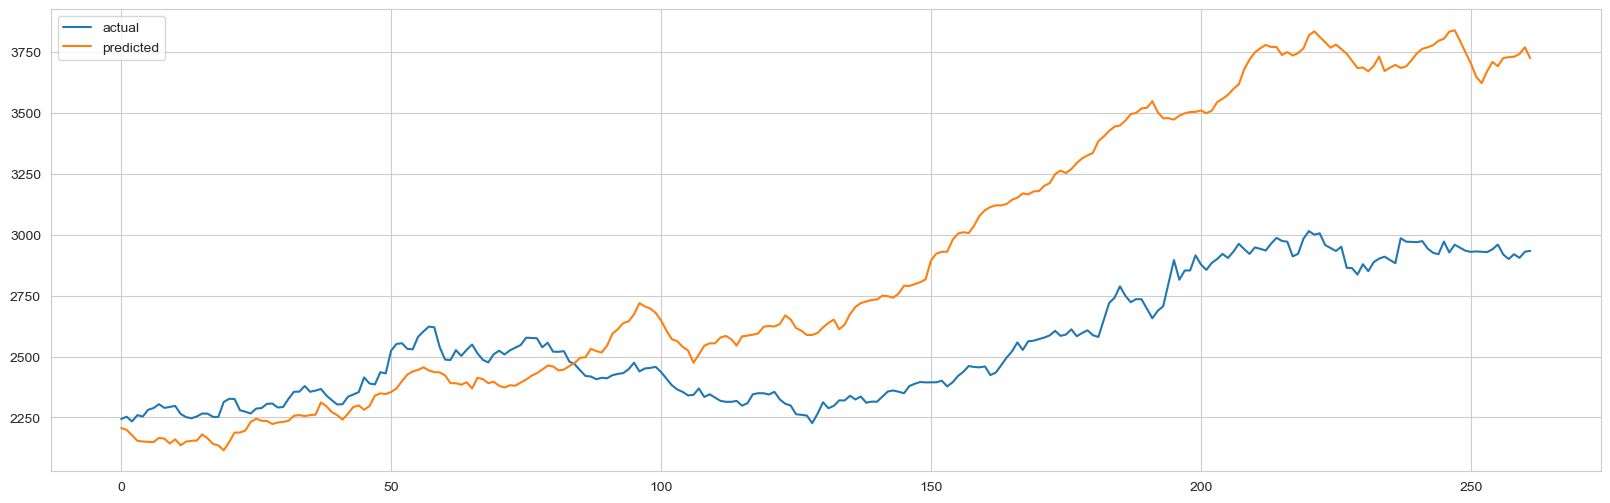

In [60]:
model_triple1=ExponentialSmoothing(train_ndata.values,trend='mul',seasonal='mul',seasonal_periods=261).fit()
triple1_test_predict=model_triple1.predict(start=train_len,end=train_len+test_len-1)
mse_triple1=mean_squared_error(test_ndata.values,triple1_test_predict)
rmse_triple1=np.sqrt(mse_triple1)
mae_triple1=mean_absolute_error(test_ndata.values,triple1_test_predict)
mape_triple1=mean_absolute_percentage_error(test_ndata.values,triple1_test_predict)
plt.figure(figsize=(20,6))
plt.plot(test_ndata.values,label='actual')
plt.plot(triple1_test_predict,label='predicted')
plt.legend()
plt.show()

###  Triple Exponential Smoothing with Trend and Seasonality = ADD

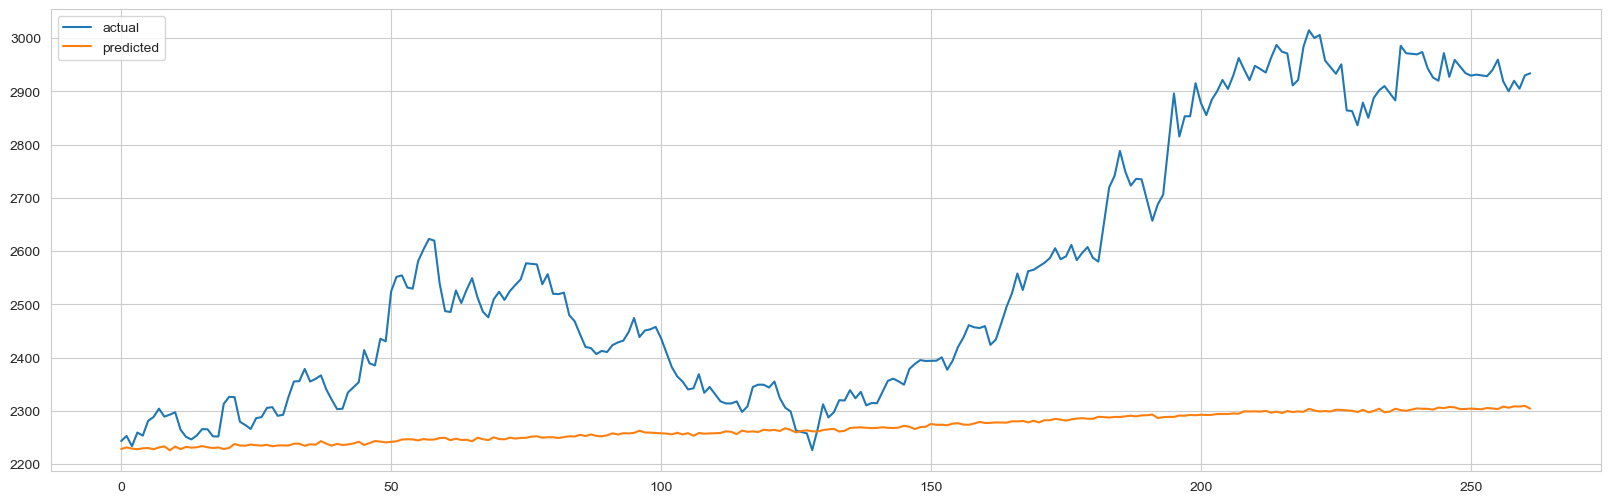

In [61]:
model_triple2=ExponentialSmoothing(train_ndata.values,trend='add',seasonal='add',seasonal_periods=261).fit()
triple2_test_predict=model_triple2.predict(start=train_len,end=train_len+test_len-1)
mse_triple2=mean_squared_error(test_ndata.values,triple2_test_predict)
rmse_triple2=np.sqrt(mse_triple2)
mae_triple2=mean_absolute_error(test_ndata.values,triple2_test_predict)
mape_triple2=mean_absolute_percentage_error(test_ndata.values,triple2_test_predict)
plt.figure(figsize=(20,6))
plt.plot(test_ndata.values,label='actual')
plt.plot(triple2_test_predict,label='predicted')
plt.legend()
plt.show()

### TRIPLE EXPONENTIAL SMOOTHING WITH SEASONALITY =MUL AND TREND =ADD

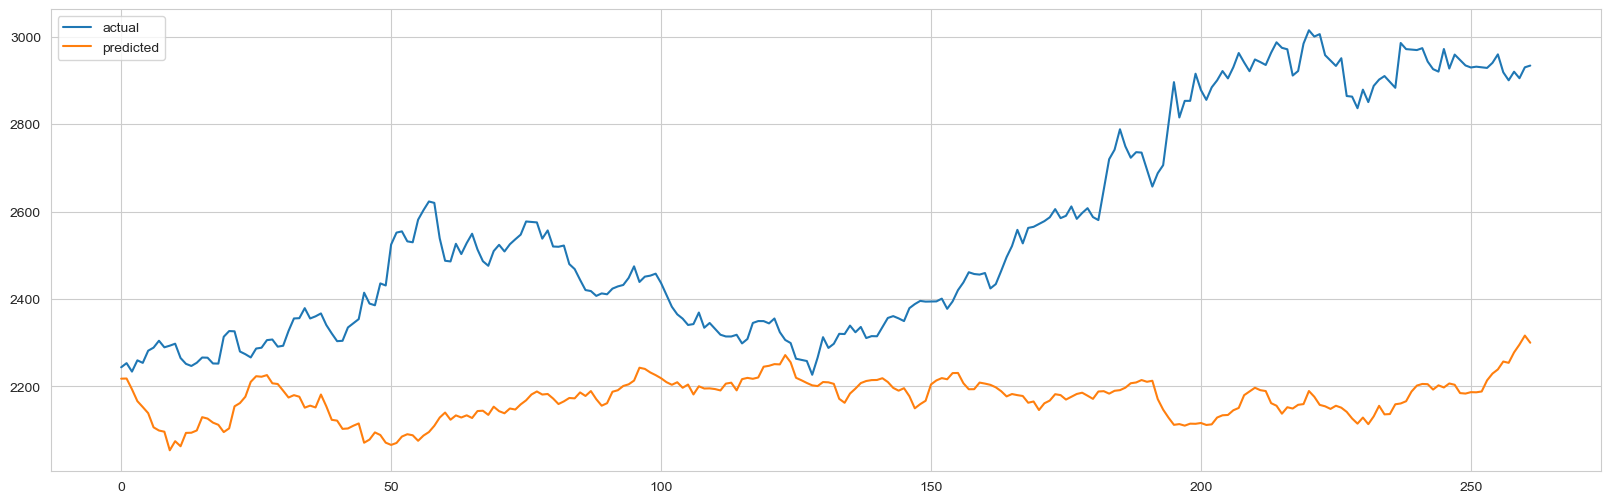

In [62]:
model_triple3=ExponentialSmoothing(train_ndata.values,trend='add',seasonal='mul',seasonal_periods=261).fit()
triple3_test_predict=model_triple3.predict(start=train_len,end=train_len+test_len-1)
mse_triple3=mean_squared_error(test_ndata.values,triple3_test_predict)
rmse_triple3=np.sqrt(mse_triple3)
mae_triple3=mean_absolute_error(test_ndata.values,triple3_test_predict)
mape_triple3=mean_absolute_percentage_error(test_ndata.values,triple3_test_predict)
plt.figure(figsize=(20,6))
plt.plot(test_ndata.values,label='actual')
plt.plot(triple3_test_predict,label='predicted')
plt.legend()
plt.show()

### TRIPLE EXPONENTIAL SMOOTHING WITH SEASONALITY =ADD AND TREND =MUL

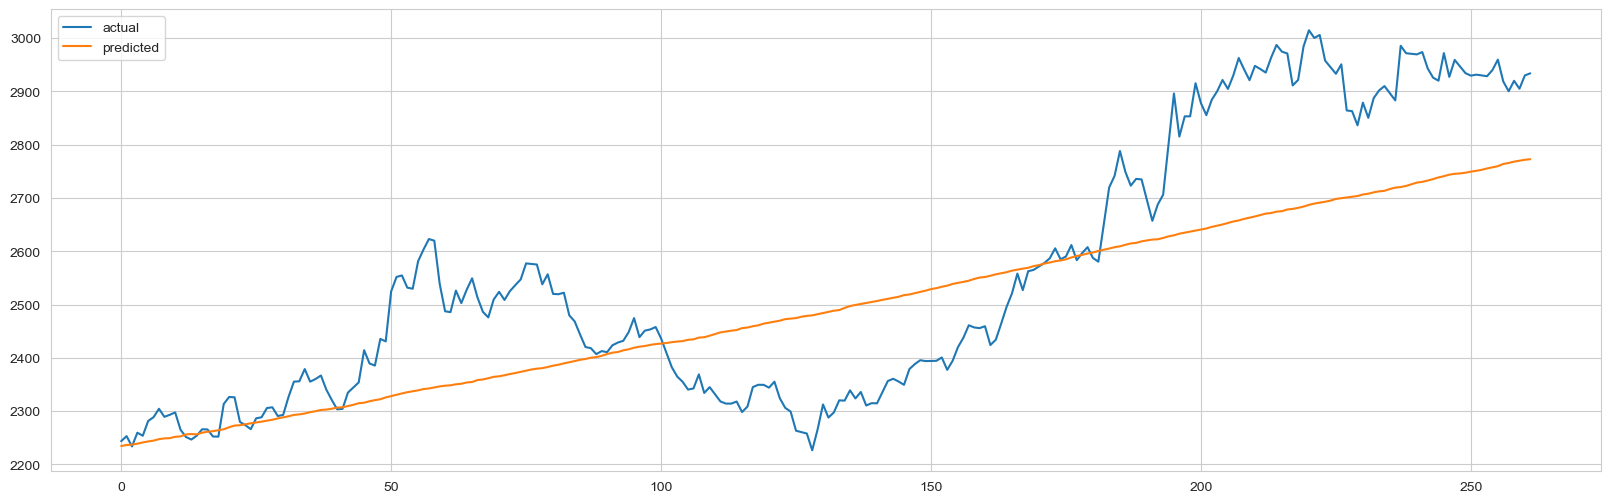

In [63]:
model_triple4=ExponentialSmoothing(train_ndata.values,trend='mul',seasonal='add',seasonal_periods=261).fit()
triple4_test_predict=model_triple4.predict(start=train_len,end=train_len+test_len-1)
mse_triple4=mean_squared_error(test_ndata.values,triple4_test_predict)
rmse_triple4=np.sqrt(mse_triple4)
mae_triple4=mean_absolute_error(test_ndata.values,triple4_test_predict)
mape_triple4=mean_absolute_percentage_error(test_ndata.values,triple4_test_predict)
plt.figure(figsize=(20,6))
plt.plot(test_ndata.values,label='actual')
plt.plot(triple4_test_predict,label='predicted')
plt.legend()
plt.show()

## ARIMA

### PACF Plot

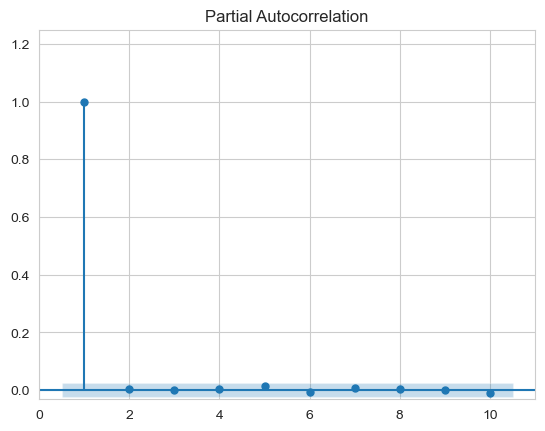

In [64]:
plot_pacf(train_ndata,lags=10,zero=False,auto_ylims=True)
plt.show()

### ACF Plot

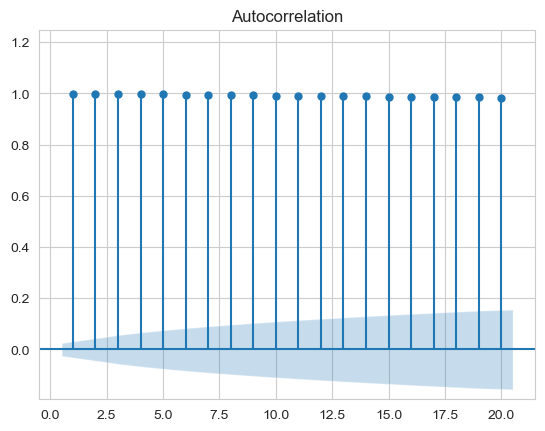

In [84]:
plot_acf(train_ndata,lags=20,zero=False,auto_ylims=True)
plt.show()

In [ ]:
auto_model=auto_arima(train_ndata,start_p=1,start_q=1,max_p=15,max_q=15,trace=True,seasonal=True)

In [ ]:
auto_model=auto_arima(train_sdata,start_p=1,start_q=1,max_p=15,max_q=15,trace=True,seasonal=True)

In [ ]:
results = []

for i in range(0, 5):
    for j in range(0, 5):
        for k in range(0, 5):
            try:
                model = ARIMA(train_ndata, order=(i, j, k)).fit()
                arima_test_predict = model.predict(start=train_len, end=(test_len + train_len) - 1)
                mse_arima = mean_squared_error(test_ndata, arima_test_predict)
                rmse_arima = np.sqrt(mse_arima)
                mae_arima = mean_absolute_error(test_ndata, arima_test_predict)
                mape_arima = mean_absolute_percentage_error(test_ndata, arima_test_predict)
                
                result = {
                    'order': (i, j, k),
                    'mse': mse_arima,
                    'mae': mae_arima,
                    'rmse': rmse_arima,
                    'mape': mape_arima
                }
                results.append(result)
                
            except Exception as e:
                print(f"An error occurred for order ({i}, {j}, {k}): {e}")
results_df = pd.DataFrame(results)

In [ ]:
results_df.sort_values('rmse',ascending=True)[:10]

In [ ]:
results_df.sort_values('mse',ascending=True)[:10]

In [65]:
arima_model=ARIMA(train_ndata,order=(3,2,3)).fit()
test_predt=arima_model.predict(start=train_len,end=(train_len+test_len)-1)

C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: >

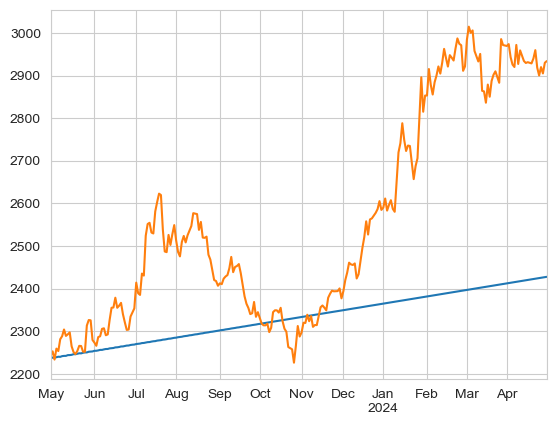

In [66]:
test_predt.plot()
test_ndata.plot()

In [67]:
np.sqrt(mean_squared_error(test_ndata,test_predt))

300.86896420040864

In [68]:
arima_model2=ARIMA(train_ndata,order=(2,1,2)).fit()
test_predt2=arima_model2.predict(start=train_len,end=(train_len+test_len)-1)

<Axes: >

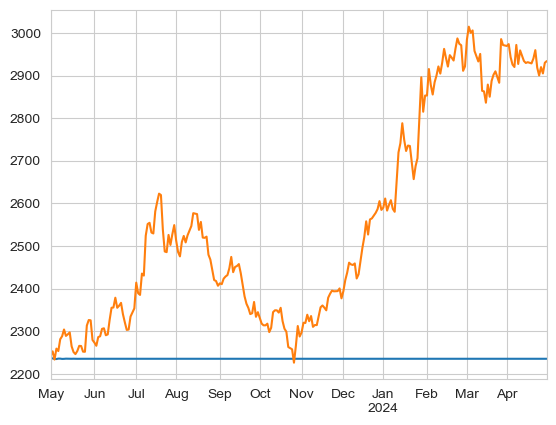

In [69]:
test_predt2.plot()
test_ndata.plot()

In [64]:
train_sdata_len=len(train_sdata)
test_sdata_len=len(test_sdata)

In [65]:
arima_model3=ARIMA(train_sdata,order=(2,1,2)).fit()
test_predt3=arima_model3.predict(start=train_sdata_len,end=(train_sdata_len+test_sdata_len)-1)

<Axes: >

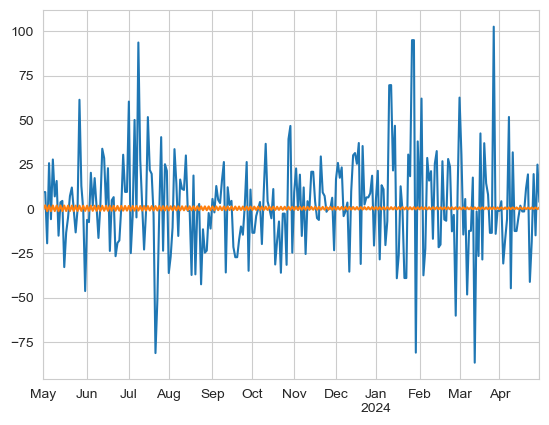

In [66]:
test_sdata.plot()
test_predt3.plot()

In [67]:
np.sqrt(mean_squared_error(test_sdata,test_predt3))

27.54461568629712

In [65]:
new_df['index']=np.arange(0,6347)

In [66]:
new_df['t_squared']=np.square(new_df['index'])

In [67]:
new_df['log_close']=np.log(new_df['close'])

In [68]:
test_new=new_df[6085:]
train_new=new_df[:6085]

### Linear Regression

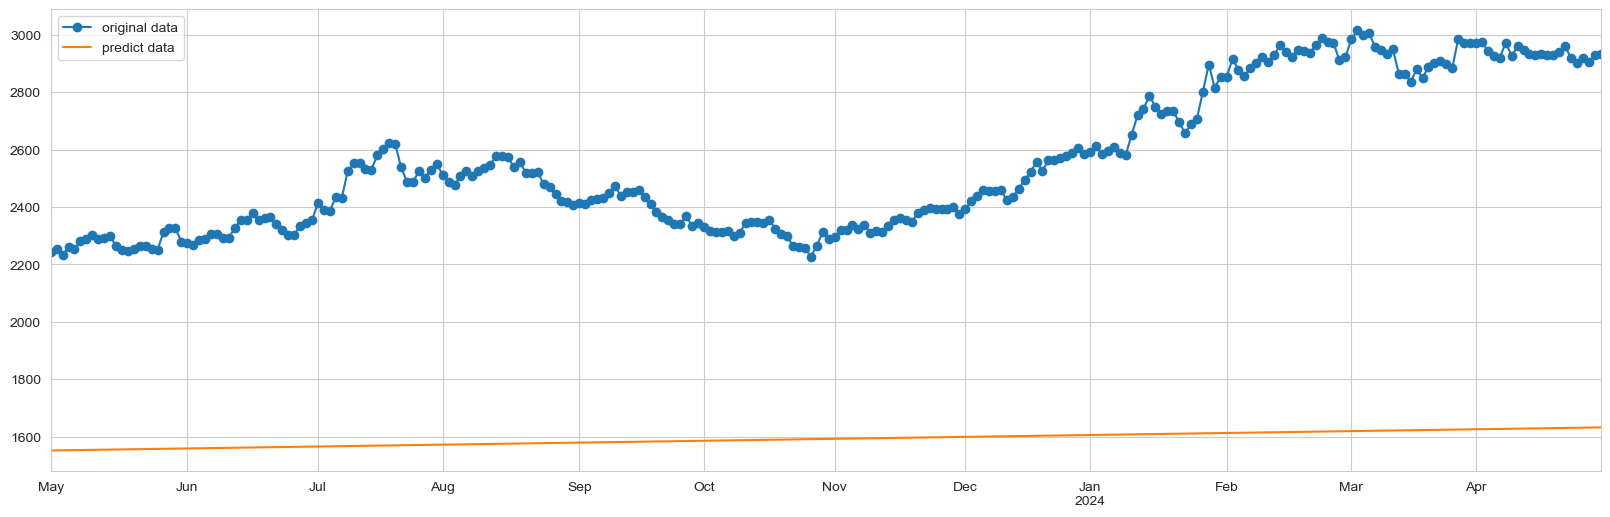

In [69]:
model_linear=smf.ols('close~index',data=train_new).fit()
linear_test_predict=pd.Series(model_linear.predict(pd.DataFrame(test_new['index'])))
mse_linear=mean_squared_error(test_new['close'],linear_test_predict)
rmse_linear=np.sqrt(mse_linear)
mae_linear=mean_absolute_error(test_new['close'],linear_test_predict)
mape_linear=mean_absolute_percentage_error(test_new['close'],linear_test_predict)
plt.figure(figsize=(20,6))
test_new['close'].plot(label='original data',marker='o')
linear_test_predict.plot(label='predict data')
plt.legend()
plt.show()

### Exponential Model

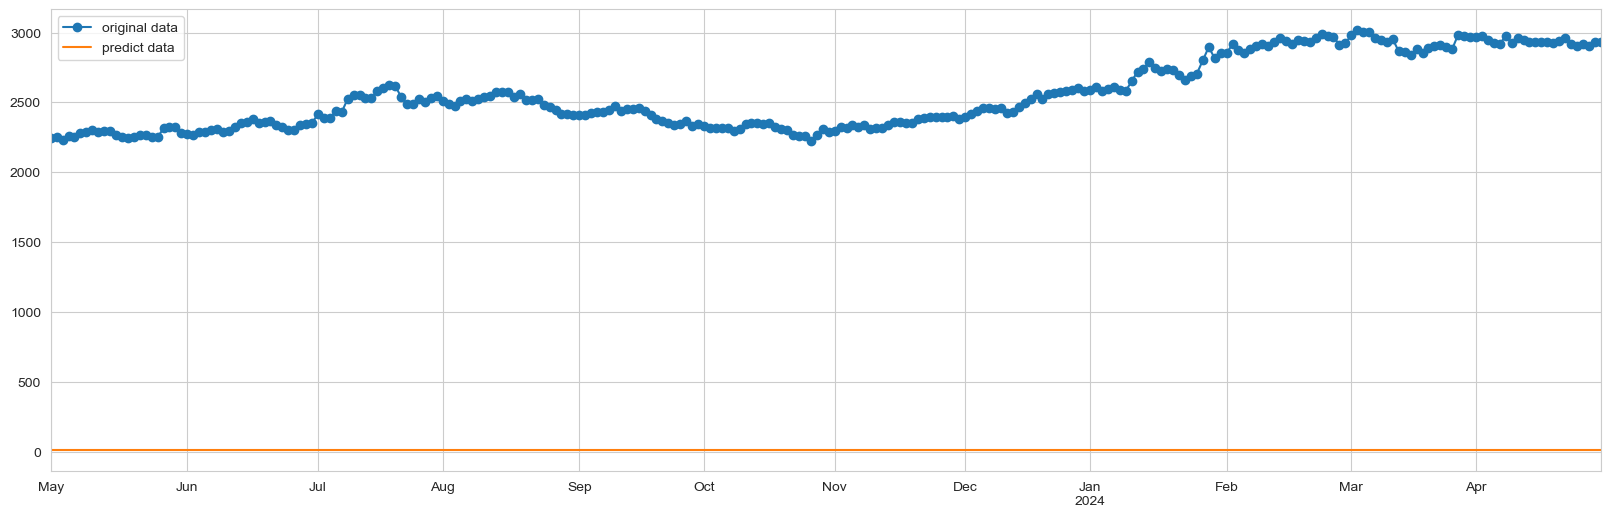

In [70]:
model_exp=smf.ols('log_close~index',data=train_new).fit()
exp_test_predict=pd.Series(model_exp.predict(pd.DataFrame(test_new['index'])))
mse_exp=mean_squared_error(test_new['close'],exp_test_predict)
rmse_exp=np.sqrt(mse_exp)
mae_exp=mean_absolute_error(test_new['close'],exp_test_predict)
mape_exp=mean_absolute_percentage_error(test_new['close'],exp_test_predict)
plt.figure(figsize=(20,6))
test_new['close'].plot(label='original data',marker='o')
exp_test_predict.plot(label='predict data')
plt.legend()
plt.show()

### QUADRATIC MODEL

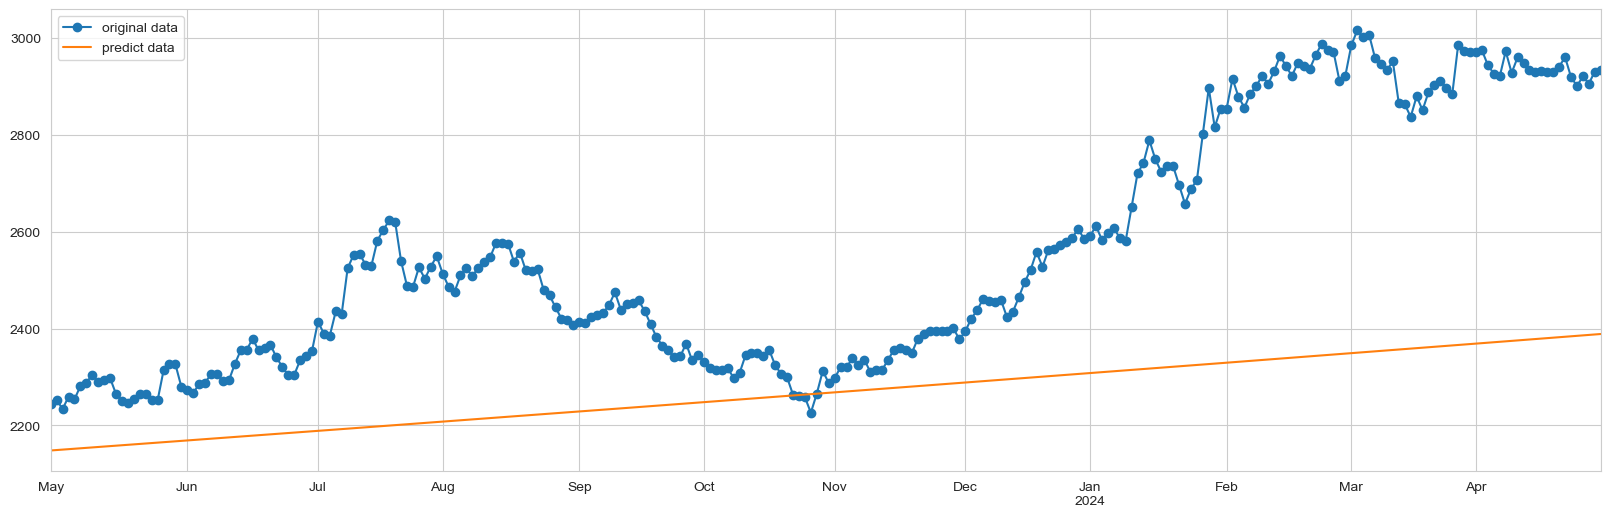

In [71]:
model_qua=smf.ols('close~index+t_squared',data=train_new).fit()
qua_test_predict=pd.Series(model_qua.predict(pd.DataFrame(test_new[['index','t_squared']])))
mse_qua=mean_squared_error(test_new['close'],qua_test_predict)
rmse_qua=np.sqrt(mse_qua)
mae_qua=mean_absolute_error(test_new['close'],qua_test_predict)
mape_qua=mean_absolute_percentage_error(test_new['close'],qua_test_predict)
plt.figure(figsize=(20,6))
test_new['close'].plot(label='original data',marker='o')
qua_test_predict.plot(label='predict data')
plt.legend()
plt.show()

### Decision Tree Regressor

In [72]:
def tuning(model,params):
    '''model,params,features'''
    grid=GridSearchCV(model,params,n_jobs=-1)
    grid.fit(train_new['index'].values.reshape(-1, 1),train_new['close'])
    bestp=grid.best_params_
    bestsc=grid.best_score_
    return bestp,bestsc

In [134]:
param_grid = {
    'criterion': ['mse', 'friedman_mse'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30],
    'min_impurity_decrease': [0.0, 0.01, 0.1],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

In [135]:
tuning(DecisionTreeRegressor(),param_grid)

({'ccp_alpha': 0.0,
  'criterion': 'friedman_mse',
  'max_depth': 10,
  'max_features': 'log2',
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'splitter': 'random'},
 -0.5043363284367937)

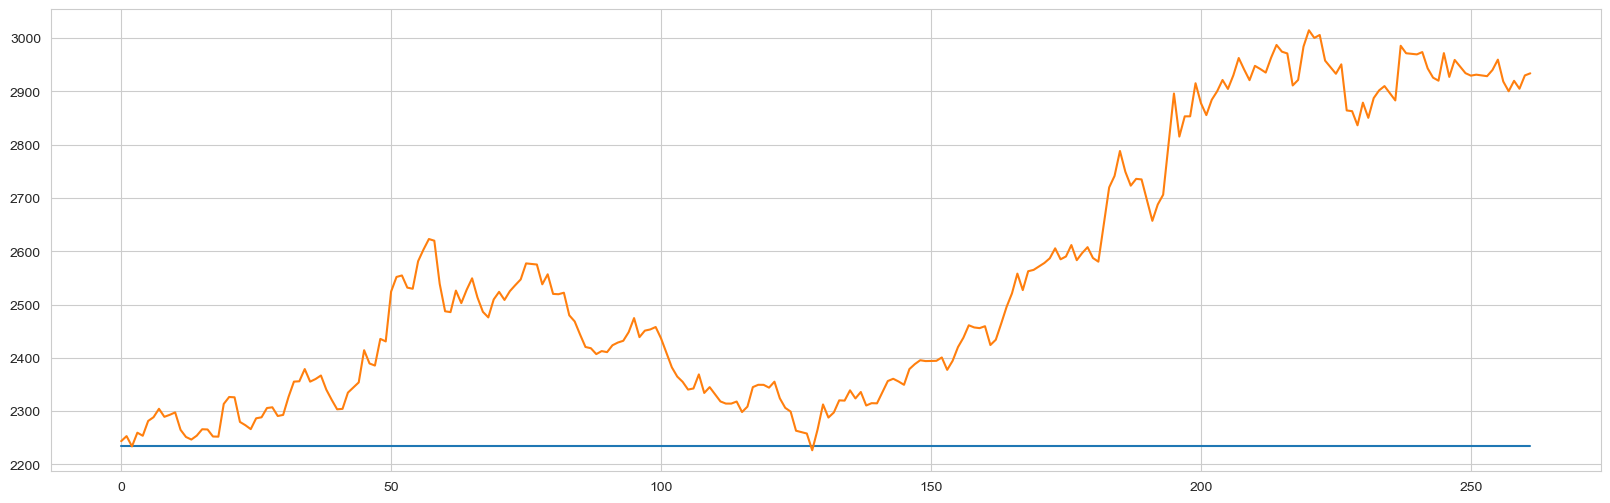

In [73]:
model_dec=DecisionTreeRegressor(ccp_alpha=0.01,criterion='friedman_mse',max_depth=10,max_features='log2',max_leaf_nodes=None,min_impurity_decrease=0.0,min_samples_leaf=1,min_samples_split=2,splitter='random')
model_dec.fit(train_new['index'].values.reshape(-1, 1),train_new['close'])
predt=model_dec.predict(train_new['index'].values.reshape(-1, 1))
mean_squared_error(train_new['close'],predt)
predt_test=model_dec.predict(test_new['index'].values.reshape(-1, 1))
plt.figure(figsize=(20,6))
plt.plot(predt_test)
plt.plot(test_new['close'].values)

In [74]:
mean_squared_error(test_new['close'],predt_test)

163229.71386283558

### Random Forest 

In [75]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [143]:
tuning(RandomForestRegressor(),param_grid)

({'bootstrap': True,
  'max_depth': None,
  'max_features': 'log2',
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 100},
 -1.0735034068487854)

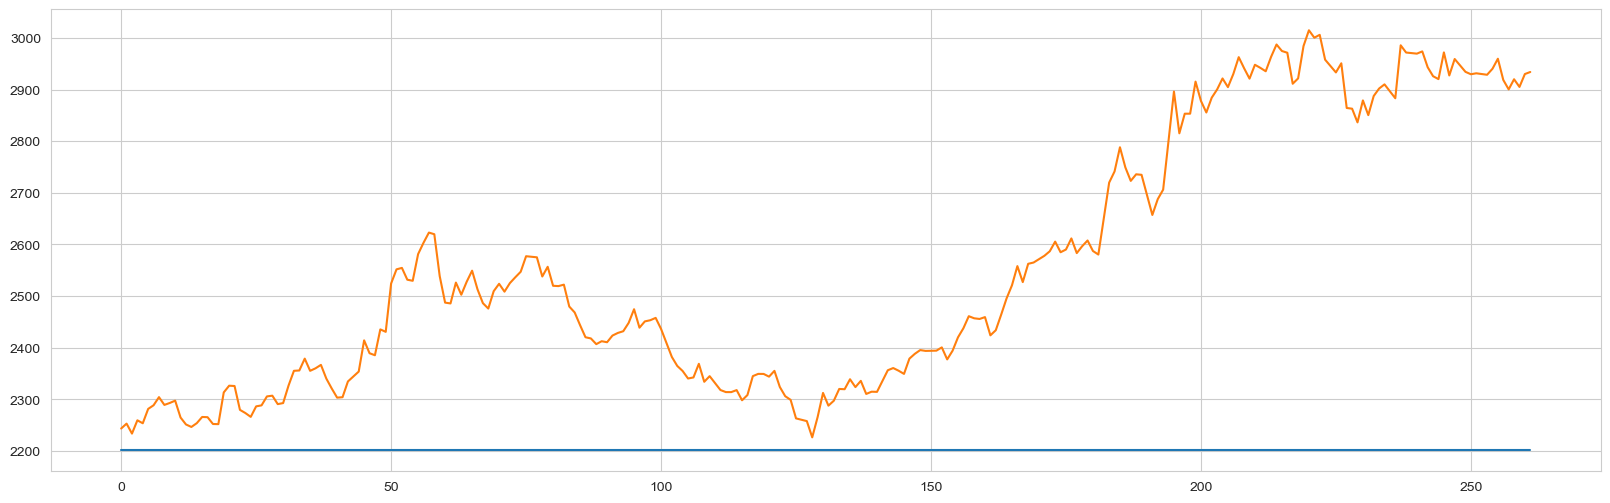

In [76]:
model_random=RandomForestRegressor(bootstrap=True,max_depth=None,max_features='log2',min_samples_leaf=2,min_samples_split=2,n_estimators=500)
model_random.fit(train_new['index'].values.reshape(-1, 1),train_new['close'])
predt_ran=model_random.predict(train_new['index'].values.reshape(-1, 1))
predt_ran_test=model_random.predict(test_new['index'].values.reshape(-1, 1))
mean_squared_error(test_new['close'],predt_ran_test)
plt.figure(figsize=(20,6))
plt.plot(predt_ran_test)
plt.plot(test_new['close'].values)